In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines
import matplotlib.ticker as mticker
import matplotlib.lines as mlines

In [2]:


def extract_metrics(content):

    patterns = {
        "Only_KNAPSACK_efficiency": r"Only KNAPSACK\s+efficiency:\s+([\d.]+)",
        "Final_Knapsack_time": r"Final Knapsack time:\s+([\d.e+-]+)",

        "Only_SFC_efficiency": r"Only SFC\s+efficiency:\s+([\d.]+)",
        "Final_SFC_time": r"Final SFC time:\s+([\d.e+-]+)",

        "SFC_painterPartition_efficiency": r"SFC\+painterPartition\s+efficiency:\s+([\d.]+)",
        "Final_SFC_Painter_time": r"Final SFC\+Painter time:\s+([\d.e+-]+)",

        "Painter_Knapsack_combined_efficiency": r"Painter\+Knapsack combined efficiency:\s+([\d.]+)",
        "Final_Painter_Knapsack_Combined_time": r"Final painter\+Knapsack_Combined time:\s+([\d.e+-]+)",

        "SFC_Knapsack_combined_efficiency": r"SFC\+Knapsack combined efficiency:\s+([\d.]+)",
        "Final_SFC_Knapsack_Combined_time": r"Final SFC\+Knapsack_Combined time:\s+([\d.e+-]+)",
    }

    run_sections = re.split(r"=== Starting Run \d+ ===", content)[1:]  
    data = []

    for run_id, section in enumerate(run_sections, start=1):
        row = {"Run": run_id}
        for key, pattern in patterns.items():
            match = re.search(pattern, section)
            if match:
                row[key] = float(match.group(1))
            else:
                row[key] = None  
        data.append(row)
    
    return data


def consolidate_data_from_files(file_list):
    all_data = []
    
    for file_path in file_list:
        with open(file_path, 'r') as file:
            content = file.read()
        
        file_data = extract_metrics(content)
        for row in file_data:
            row["File"] = file_path
        all_data.extend(file_data)
    
    return pd.DataFrame(all_data)

file_paths = ['../output/run_250/4_4_output_worst.txt', '../output/run_250/4_8_output_worst.txt', '../output/run_250/4_16_output_worst.txt',
              '../output/run_250/8_4_output_worst.txt', '../output/run_250/8_8_output_worst.txt', '../output/run_250/8_16_output_worst.txt',
              '../output/run_250/16_4_output_worst.txt', '../output/run_250/16_8_output_worst.txt', '../output/run_250/16_16_output_worst.txt',
              '../output/run_250/32_4_output_worst.txt', '../output/run_250/32_8_output_worst.txt', '../output/run_250/32_16_output_worst.txt',
              '../output/run_250/64_4_output_worst.txt', '../output/run_250/64_8_output_worst.txt', '../output/run_250/64_16_output_worst.txt',
              '../output/run_250/128_4_output_worst.txt', '../output/run_250/128_8_output_worst.txt', '../output/run_250/128_16_output_worst.txt',
              '../output/run_250/256_4_output_worst.txt', '../output/run_250/256_8_output_worst.txt', '../output/run_250/256_16_output_worst.txt',
              '../output/run_250/512_4_output_worst.txt','../output/run_250/512_8_output_worst.txt','../output/run_250/512_16_output_worst.txt']
            #   '../output/run_250/1024_4_output_worst.txt','../output/run_250/1024_8_output_worst.txt','../output/run_250/1024_16_output_worst.txt']




result_df = consolidate_data_from_files(file_paths)




In [3]:
result_df

Run  Only_KNAPSACK_efficiency  Final_Knapsack_time  Only_SFC_efficiency  \
0       1                  0.972503             0.001944             0.851986   
1       2                  0.984091             0.001621             0.880539   
2       3                  0.981606             0.001607             0.904110   
3       4                  0.996317             0.001535             0.923681   
4       5                  0.967002             0.001592             0.857836   
...   ...                       ...                  ...                  ...   
5995  246                  0.995319             0.161242             0.928542   
5996  247                  0.995119             0.157507             0.937726   
5997  248                  0.995368             0.600863             0.938227   
5998  249                  0.995360             0.205579             0.926445   
5999  250                  0.995544             0.164021             0.929979   

      Final_SFC_time  SFC_painterPartition_efficiency  Final_SFC_Painter_time  \
0           0.001420                         0.887999                0.000181   
1           0.001354                         0.949636                0.000144   
2           0.001308                         0.904110                0.000147   
3           0.001296                         0.923681                0.000142   
4           0.001333                         0.880470                0.000138   
...              ...                              ...                     ...   
5995        0.075884                         0.967650                0.173877   
5996        0.179491                         0.967479                0.180112   
5997        0.116795                         0.966567                0.178781   
5998        0.110128                         0.968204                0.173130   
5999        0.086976                         0.967538                0.173189   

      Painter_Knapsack_combined_efficiency  \
0                                 0.972503   
1                                 0.984091   
2                                 0.981606   
3                                 0.996317   
4                                 0.967002   
...                                    ...   
5995                              0.967116   
5996                              0.971372   
5997                              0.966193   
5998                              0.970207   
5999                              0.971007   

      Final_Painter_Knapsack_Combined_time  SFC_Knapsack_combined_efficiency  \
0                                 0.000940                          0.972503   
1                                 0.000914                          0.984091   
2                                 0.000867                          0.981606   
3                                 0.000841                          0.996317   
4                                 0.000918                          0.967002   
...                                    ...                               ...   
5995                              0.210520                          0.965119   
5996                              0.338708                          0.966663   
5997                              0.369476                          0.968273   
5998                              0.330142                          0.964833   
5999                              0.318964                          0.967601   

      Final_SFC_Knapsack_Combined_time  \
0                             0.000968   
1                             0.000914   
2                             0.000884   
3                             0.000929   
4                             0.000955   
...                                ...   
5995                          0.040921   
5996                          0.139740   
5997                          0.157596   
5998                          0.283473   
5999                          0.059510   

                                         

In [4]:
result_df.head(10)

Run  Only_KNAPSACK_efficiency  Final_Knapsack_time  Only_SFC_efficiency  \
0    1                  0.972503             0.001944             0.851986   
1    2                  0.984091             0.001621             0.880539   
2    3                  0.981606             0.001607             0.904110   
3    4                  0.996317             0.001535             0.923681   
4    5                  0.967002             0.001592             0.857836   
5    6                  0.997898             0.001667             0.847004   
6    7                  0.987514             0.001598             0.888411   
7    8                  0.992497             0.002484             0.957418   
8    9                  0.998268             0.002459             0.925014   
9   10                  0.988970             0.001828             0.846188   

   Final_SFC_time  SFC_painterPartition_efficiency  Final_SFC_Painter_time  \
0        0.001420                         0.887999                0.000181   
1        0.001354                         0.949636                0.000144   
2        0.001308                         0.904110                0.000147   
3        0.001296                         0.923681                0.000142   
4        0.001333                         0.880470                0.000138   
5        0.001351                         0.966993                0.000155   
6        0.043719                         0.917252                0.000276   
7        0.001785                         0.957418                0.000174   
8        0.001378                         0.925014                0.000198   
9        0.001383                         0.923013                0.000175   

   Painter_Knapsack_combined_efficiency  Final_Painter_Knapsack_Combined_time  \
0                              0.972503                              0.000940   
1                              0.984091                              0.000914   
2                              0.981606                              0.000867   
3                              0.996317                              0.000841   
4                              0.967002                              0.000918   
5                              0.997898                              0.000883   
6                              0.987514                              0.001170   
7                              0.992497                              0.001128   
8                              0.998268                              0.000963   
9                              0.988970                              0.000956   

   SFC_Knapsack_combined_efficiency  Final_SFC_Knapsack_Combined_time  \
0                          0.972503                          0.000968   
1                          0.984091                          0.000914   
2                          0.981606                          0.000884   
3                          0.996317                          0.000929   
4                          0.967002                          0.000955   
5                          0.997898                          0.000889   
6                          0.987514                          0.001374   
7                          0.992497                          0.001339   
8                          0.998268                          0.000984   
9                          0.988970                          0.001031   

                                     File  
0  ../output/run_250/4_4_output_worst.txt  
1  ../output/run_250/4_4_output_worst.txt  
2  ../output/run_250/4_4_output_worst.txt  
3  ../output/run_250/4_4_output_worst.txt  
4  ../output/run_250/4_4_output_worst.txt  
5  ../output/run_250/4_4_output_worst.txt  
6  ../output/run_250/4_4_output_worst.txt  
7  ../output/run_250/4_4_output_worst.txt  
8  ../output/run_250/4_4_output_worst.txt  
9  ../output/run_250/4_4_output_worst.txt

In [5]:
result_df['File'] = result_df['File'].apply(lambda x: os.path.splitext(os.path.basename(x))[0])

In [6]:
result_df['File'] = result_df['File'].apply(lambda x: '_'.join([word.capitalize() for word in x.split('_')]))

In [7]:
result_df

Run  Only_KNAPSACK_efficiency  Final_Knapsack_time  Only_SFC_efficiency  \
0       1                  0.972503             0.001944             0.851986   
1       2                  0.984091             0.001621             0.880539   
2       3                  0.981606             0.001607             0.904110   
3       4                  0.996317             0.001535             0.923681   
4       5                  0.967002             0.001592             0.857836   
...   ...                       ...                  ...                  ...   
5995  246                  0.995319             0.161242             0.928542   
5996  247                  0.995119             0.157507             0.937726   
5997  248                  0.995368             0.600863             0.938227   
5998  249                  0.995360             0.205579             0.926445   
5999  250                  0.995544             0.164021             0.929979   

      Final_SFC_time  SFC_painterPartition_efficiency  Final_SFC_Painter_time  \
0           0.001420                         0.887999                0.000181   
1           0.001354                         0.949636                0.000144   
2           0.001308                         0.904110                0.000147   
3           0.001296                         0.923681                0.000142   
4           0.001333                         0.880470                0.000138   
...              ...                              ...                     ...   
5995        0.075884                         0.967650                0.173877   
5996        0.179491                         0.967479                0.180112   
5997        0.116795                         0.966567                0.178781   
5998        0.110128                         0.968204                0.173130   
5999        0.086976                         0.967538                0.173189   

      Painter_Knapsack_combined_efficiency  \
0                                 0.972503   
1                                 0.984091   
2                                 0.981606   
3                                 0.996317   
4                                 0.967002   
...                                    ...   
5995                              0.967116   
5996                              0.971372   
5997                              0.966193   
5998                              0.970207   
5999                              0.971007   

      Final_Painter_Knapsack_Combined_time  SFC_Knapsack_combined_efficiency  \
0                                 0.000940                          0.972503   
1                                 0.000914                          0.984091   
2                                 0.000867                          0.981606   
3                                 0.000841                          0.996317   
4                                 0.000918                          0.967002   
...                                    ...                               ...   
5995                              0.210520                          0.965119   
5996                              0.338708                          0.966663   
5997                              0.369476                          0.968273   
5998                              0.330142                          0.964833   
5999                              0.318964                          0.967601   

      Final_SFC_Knapsack_Combined_time                 File  
0                             0.000968     4_4_Output_Worst  
1                             0.000914     4_4_Output_Worst  
2                             0.000884     4_4_Output_Worst  
3                             0.000929     4_4_Output_Worst  
4                             0.000955     4_4_Output_Worst  
...                                ...                  ...  
5995                          0.040921  512_16_Output_Worst  
5996                          0.139740  512_16_Out

In [8]:
result_df = result_df.rename(columns={'Only_KNAPSACK_efficiency': 'Only_Knapsack_Efficiency', 'Final_Knapsack_time': 'Only_Knapsack_Final_Time', 'Only_SFC_efficiency':'Only_SFC_Efficiency','Final_SFC_time': 'Only_SFC_Final_Time','SFC_painterPartition_efficiency': 'SFC_PainterPartition_Efficiency','Final_SFC_Painter_time': 'SFC_PainterPartition_Final_Time','Painter_Knapsack_combined_efficiency':'Painter_Knapsack_Combined_Efficiency','Final_Painter_Knapsack_Combined_time':'Painter_Knapsack_Combined_Final_Time','SFC_Knapsack_combined_efficiency':'SFC_Knapsack_Combined_Efficiency','Final_SFC_Knapsack_Combined_time':'SFC_Knapsack_Combined_Final_Time'} )

In [9]:
result_df

Run  Only_Knapsack_Efficiency  Only_Knapsack_Final_Time  \
0       1                  0.972503                  0.001944   
1       2                  0.984091                  0.001621   
2       3                  0.981606                  0.001607   
3       4                  0.996317                  0.001535   
4       5                  0.967002                  0.001592   
...   ...                       ...                       ...   
5995  246                  0.995319                  0.161242   
5996  247                  0.995119                  0.157507   
5997  248                  0.995368                  0.600863   
5998  249                  0.995360                  0.205579   
5999  250                  0.995544                  0.164021   

      Only_SFC_Efficiency  Only_SFC_Final_Time  \
0                0.851986             0.001420   
1                0.880539             0.001354   
2                0.904110             0.001308   
3                0.923681             0.001296   
4                0.857836             0.001333   
...                   ...                  ...   
5995             0.928542             0.075884   
5996             0.937726             0.179491   
5997             0.938227             0.116795   
5998             0.926445             0.110128   
5999             0.929979             0.086976   

      SFC_PainterPartition_Efficiency  SFC_PainterPartition_Final_Time  \
0                            0.887999                         0.000181   
1                            0.949636                         0.000144   
2                            0.904110                         0.000147   
3                            0.923681                         0.000142   
4                            0.880470                         0.000138   
...                               ...                              ...   
5995                         0.967650                         0.173877   
5996                         0.967479                         0.180112   
5997                         0.966567                         0.178781   
5998                         0.968204                         0.173130   
5999                         0.967538                         0.173189   

      Painter_Knapsack_Combined_Efficiency  \
0                                 0.972503   
1                                 0.984091   
2                                 0.981606   
3                                 0.996317   
4                                 0.967002   
...                                    ...   
5995                              0.967116   
5996                              0.971372   
5997                              0.966193   
5998                              0.970207   
5999                              0.971007   

      Painter_Knapsack_Combined_Final_Time  SFC_Knapsack_Combined_Efficiency  \
0                                 0.000940                          0.972503   
1                                 0.000914                          0.984091   
2                                 0.000867                          0.981606   
3                                 0.000841                          0.996317   
4                                 0.000918                          0.967002   
...                                    ...                               ...   
5995                              0.210520                          0.965119   
5996                              0.338708                          0.966663   
5997                              0.369476                          0.968273   
5998                              0.330142                          0.964833   
5999                              0.318964                          0.967601   

      SFC_Knapsack_Combined_Final_Time                 File  
0                             0.000968     4_4_Output_Worst  
1                             0.000914     4_4_Output_Worst  
2                             0.000

In [10]:
column_list = result_df['SFC_Knapsack_Combined_Efficiency'].tolist()

In [11]:
print(column_list)

[0.9725031152, 0.9840912076, 0.9816057356, 0.9963174218, 0.9670018301, 0.9978984036, 0.9875141075, 0.9924969159, 0.998268356, 0.9889695879, 0.9928384774, 0.991463784, 0.9913852836, 0.9753100747, 0.9851848307, 0.9967333855, 0.9945519356, 0.9863781128, 0.9547902204, 0.9628354332, 0.9807931758, 0.9773517944, 0.9917602815, 0.9867832812, 0.9687208116, 0.9653469254, 0.9819226921, 0.9733380559, 0.9637119816, 0.9743072429, 0.9967021981, 0.9860995601, 0.9901669538, 0.9519116547, 0.9742446489, 0.9641931708, 0.9787184616, 0.9672573529, 0.9608747304, 0.9782272037, 0.9935883496, 0.9907000726, 0.959647363, 0.9681874413, 0.9925015336, 0.9625931436, 0.995040459, 0.9740102541, 0.9800761806, 0.9715837151, 0.984536876, 0.9702716136, 0.9580614038, 0.973149443, 0.9830231845, 0.9459548705, 0.9511591657, 0.984613863, 0.9910317702, 0.9872182827, 0.9788917803, 0.9889442682, 0.9683270124, 0.9802060359, 0.9926777175, 0.9868940519, 0.987986505, 0.9779040862, 0.9791158845, 0.9877868314, 0.9639445874, 0.9842697627,

In [12]:
# output_file = "./result/data.xlsx"

# with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
#     for file_name, group in result_df.groupby('File', sort=False):
#         sheet_name = file_name.split("/")[-1].replace(".txt", "")
#         group.to_excel(writer, sheet_name=sheet_name, index=False)


In [13]:
filename = '4_4_Output_Worst'
df_1 = result_df[result_df['File'] == filename]

In [14]:
df_1

Run  Only_Knapsack_Efficiency  Only_Knapsack_Final_Time  \
0      1                  0.972503                  0.001944   
1      2                  0.984091                  0.001621   
2      3                  0.981606                  0.001607   
3      4                  0.996317                  0.001535   
4      5                  0.967002                  0.001592   
..   ...                       ...                       ...   
245  246                  0.989852                  0.001454   
246  247                  0.967514                  0.001518   
247  248                  0.990341                  0.001470   
248  249                  0.968974                  0.001456   
249  250                  0.969699                  0.001442   

     Only_SFC_Efficiency  Only_SFC_Final_Time  \
0               0.851986             0.001420   
1               0.880539             0.001354   
2               0.904110             0.001308   
3               0.923681             0.001296   
4               0.857836             0.001333   
..                   ...                  ...   
245             0.860107             0.001185   
246             0.774446             0.001213   
247             0.799124             0.001220   
248             0.880161             0.001196   
249             0.773773             0.001220   

     SFC_PainterPartition_Efficiency  SFC_PainterPartition_Final_Time  \
0                           0.887999                         0.000181   
1                           0.949636                         0.000144   
2                           0.904110                         0.000147   
3                           0.923681                         0.000142   
4                           0.880470                         0.000138   
..                               ...                              ...   
245                         0.966248                         0.000136   
246                         0.966870                         0.000134   
247                         0.955570                         0.000144   
248                         0.952794                         0.000140   
249                         0.878731                         0.000136   

     Painter_Knapsack_Combined_Efficiency  \
0                                0.972503   
1                                0.984091   
2                                0.981606   
3                                0.996317   
4                                0.967002   
..                                    ...   
245                              0.989852   
246                              0.967514   
247                              0.990341   
248                              0.968974   
249                              0.969699   

     Painter_Knapsack_Combined_Final_Time  SFC_Knapsack_Combined_Efficiency  \
0                                0.000940                          0.972503   
1                                0.000914                          0.984091   
2                                0.000867                          0.981606   
3                                0.000841                          0.996317   
4                                0.000918                          0.967002   
..                                    ...                               ...   
245                              0.000835                          0.989852   
246                              0.000837                          0.967514   
247                              0.000815                          0.990341   
248                              0.000826                          0.968974   
249                              0.000822                          0.969699   

     SFC_Knapsack_Combined_Final_Time              File  
0                            0.000968  4_4_Output_Worst  
1                            0.000914  4_4_Output_Worst  
2                            0.000884  4_4_Output_Worst  
3                            0.000929  4_4_Outpu

In [15]:
pd.set_option('display.max_columns', None)

In [16]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

# file_order = result_df['File'].drop_duplicates().tolist()
# result_df['File'] = pd.Categorical(result_df['File'], categories=file_order, ordered=True)

# grouped = result_df.groupby('File', sort=False)

# for file_name, group in grouped:
#     group = group.sort_values('Run')

#     fig, ax = plt.subplots(figsize=(20, 10))
#     ax.set_title(f'Efficiency Variation over Runs for Output Test Case: {file_name}', fontsize=20)
#     ax.set_xlabel('Run', fontsize=20)
#     ax.set_ylabel('Efficiency', fontsize=20)
#     plt.xticks(fontsize=16)
#     plt.yticks(fontsize=16)

#     for alg_name, eff_col, _ in algorithms:
#         ax.plot(group['Run'], group[eff_col], label=alg_name, marker='o', linestyle='-', linewidth=1, markersize=4)

#     ax.legend(title='Algorithms', title_fontsize=20, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#     ax.grid(True)
#     plt.tight_layout()
#     efficiency_filename = f'./result/all_run_data/{file_name}_efficiency.png'
#     plt.savefig(efficiency_filename, dpi=600)
#     plt.show()
#     fig, ax = plt.subplots(figsize=(20, 10))
#     ax.set_title(f'Time Variation over Runs for Output Test Case: {file_name}', fontsize=20)
#     ax.set_xlabel('Run', fontsize=20)
#     ax.set_ylabel('Time (seconds)', fontsize=20)
#     plt.xticks(fontsize=16)
#     plt.yticks(fontsize=16)

#     for alg_name, _, time_col in algorithms:
#         ax.plot(group['Run'], group[time_col], label=alg_name, marker='o', linestyle='-', linewidth=1, markersize=4)

#     ax.legend(title='Algorithms', title_fontsize=20, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#     ax.grid(True)
#     plt.tight_layout()
#     time_filename = f'./result/all_run_data/{file_name}_time.png'
#     plt.savefig(time_filename, dpi=600)
#     plt.show()


In [17]:
file_order = result_df['File'].drop_duplicates().tolist()
result_df['File'] = pd.Categorical(result_df['File'], categories=file_order, ordered=True)

grouped = result_df.groupby('File', sort=False)


/tmp/ipykernel_1619279/3567121358.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = result_df.groupby('File', sort=False)


In [18]:
specific_group = grouped.get_group('4_8_Output_Worst')
specific_group

Run  Only_Knapsack_Efficiency  Only_Knapsack_Final_Time  \
250    1                  0.991193                  0.001662   
251    2                  0.983767                  0.001563   
252    3                  0.995813                  0.001573   
253    4                  0.992310                  0.001526   
254    5                  0.987835                  0.001662   
..   ...                       ...                       ...   
495  246                  0.990010                  0.001468   
496  247                  0.996098                  0.001476   
497  248                  0.990514                  0.001458   
498  249                  0.975653                  0.001520   
499  250                  0.988541                  0.001518   

     Only_SFC_Efficiency  Only_SFC_Final_Time  \
250             0.963902             0.001481   
251             0.939513             0.001288   
252             0.932786             0.001258   
253             0.879359             0.001241   
254             0.931594             0.001279   
..                   ...                  ...   
495             0.898539             0.001213   
496             0.936622             0.001204   
497             0.899932             0.001162   
498             0.908342             0.001187   
499             0.914792             0.001218   

     SFC_PainterPartition_Efficiency  SFC_PainterPartition_Final_Time  \
250                         0.963902                         0.000149   
251                         0.982989                         0.000154   
252                         0.932786                         0.000155   
253                         0.925091                         0.000136   
254                         0.935439                         0.000161   
..                               ...                              ...   
495                         0.931420                         0.000167   
496                         0.953584                         0.000143   
497                         0.966525                         0.000130   
498                         0.941826                         0.000142   
499                         0.964362                         0.000131   

     Painter_Knapsack_Combined_Efficiency  \
250                              0.991193   
251                              0.983767   
252                              0.995813   
253                              0.992310   
254                              0.987835   
..                                    ...   
495                              0.990010   
496                              0.996098   
497                              0.990514   
498                              0.975653   
499                              0.988541   

     Painter_Knapsack_Combined_Final_Time  SFC_Knapsack_Combined_Efficiency  \
250                              0.000872                          0.991193   
251                              0.000872                          0.983767   
252                              0.000840                          0.995813   
253                              0.000839                          0.992310   
254                              0.000898                          0.987835   
..                                    ...                               ...   
495                              0.000806                          0.990010   
496                              0.000840                          0.996098   
497                              0.001862                          0.990514   
498                              0.000816                          0.975653   
499                              0.000824                          0.988541   

     SFC_Knapsack_Combined_Final_Time              File  
250                          0.000959  4_8_Output_Worst  
251                          0.000890  4_8_Output_Worst  
252                          0.000910  4_8_Output_Worst  
253                          0.000904  4_8_Outpu

In [19]:
specific_group = specific_group['Only_Knapsack_Efficiency'].mean()
specific_group

np.float64(0.9907357241324001)

In [20]:
efficiency_cols = [
    'Only_Knapsack_Efficiency',
    'SFC_PainterPartition_Efficiency',
    'Painter_Knapsack_Combined_Efficiency',
    'Only_SFC_Efficiency',
    'SFC_Knapsack_Combined_Efficiency'
]

time_cols = [
    'Only_Knapsack_Final_Time',
    'SFC_PainterPartition_Final_Time',
    'Painter_Knapsack_Combined_Final_Time',
    'Only_SFC_Final_Time',
    'SFC_Knapsack_Combined_Final_Time'
]

all_cols = efficiency_cols + time_cols

unique_files = result_df['File'].drop_duplicates()
result_df['File'] = pd.Categorical(result_df['File'], categories=unique_files, ordered=True)
agg_funcs = {col: ['mean', 'std', 'min', 'max'] for col in all_cols}
grouped = result_df.groupby('File', sort=False).agg(agg_funcs)
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped = grouped.reset_index()
grouped['File'] = pd.Categorical(grouped['File'], categories=unique_files, ordered=True)
grouped = grouped.sort_values('File')

/tmp/ipykernel_1619279/1353519746.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = result_df.groupby('File', sort=False).agg(agg_funcs)


In [21]:
grouped

File  Only_Knapsack_Efficiency_mean  \
0      4_4_Output_Worst                       0.979252   
1      4_8_Output_Worst                       0.990736   
2     4_16_Output_Worst                       0.995809   
3      8_4_Output_Worst                       0.976785   
4      8_8_Output_Worst                       0.989703   
5     8_16_Output_Worst                       0.995328   
6     16_4_Output_Worst                       0.975259   
7     16_8_Output_Worst                       0.988797   
8    16_16_Output_Worst                       0.995231   
9     32_4_Output_Worst                       0.974233   
10    32_8_Output_Worst                       0.989072   
11   32_16_Output_Worst                       0.995139   
12    64_4_Output_Worst                       0.973615   
13    64_8_Output_Worst                       0.988960   
14   64_16_Output_Worst                       0.995256   
15   128_4_Output_Worst                       0.972856   
16   128_8_Output_Worst                       0.989199   
17  128_16_Output_Worst                       0.995268   
18   256_4_Output_Worst                       0.972500   
19   256_8_Output_Worst                       0.989201   
20  256_16_Output_Worst                       0.995333   
21   512_4_Output_Worst                       0.972042   
22   512_8_Output_Worst                       0.989081   
23  512_16_Output_Worst                       0.995340   

    Only_Knapsack_Efficiency_std  Only_Knapsack_Efficiency_min  \
0                       0.012742                      0.926739   
1                       0.005819                      0.970898   
2                       0.002482                      0.987458   
3                       0.011374                      0.916502   
4                       0.004520                      0.971434   
5                       0.002008                      0.988915   
6                       0.009043                      0.948714   
7                       0.003754                      0.976774   
8                       0.001471                      0.990788   
9                       0.006133                      0.951465   
10                      0.002782                      0.981998   
11                      0.001105                      0.991798   
12                      0.004253                      0.956254   
13                      0.002135                      0.982381   
14                      0.000818                      0.992351   
15                      0.003269                      0.960329   
16                      0.001475                      0.983769   
17                      0.000671                      0.992411   
18                      0.002526                      0.964328   
19                      0.001186                      0.986019   
20                      0.000506                      0.993527   
21                      0.001817                      0.967377   
22                      0.000791                      0.986978   
23                      0.000367                      0.994125   

    Only_Knapsack_Efficiency_max  SFC_PainterPartition_Efficiency_mean  \
0                       0.998268                              0.910214   
1                       0.999140                              0.951124   
2                       0.999651                              0.976340   
3                       0.995745                              0.897108   
4                       0.997724                              0.944332   
5                       0.999180                              0.971262   
6                       0.993327                              0.890053   
7                       0.997552                              0.942094   
8                       0.998800                              0.969544   
9                       0.989379                              0.887400   
10                      0.996958                              0.939539   
11                      0.997

In [22]:
grouped['File'] = grouped['File'].str.replace(r'(\d+)_(\d+)_Output_Worst', r'\1R_\2BPR', regex=True)

In [23]:
grouped

File  Only_Knapsack_Efficiency_mean  Only_Knapsack_Efficiency_std  \
0      4R_4BPR                       0.979252                      0.012742   
1      4R_8BPR                       0.990736                      0.005819   
2     4R_16BPR                       0.995809                      0.002482   
3      8R_4BPR                       0.976785                      0.011374   
4      8R_8BPR                       0.989703                      0.004520   
5     8R_16BPR                       0.995328                      0.002008   
6     16R_4BPR                       0.975259                      0.009043   
7     16R_8BPR                       0.988797                      0.003754   
8    16R_16BPR                       0.995231                      0.001471   
9     32R_4BPR                       0.974233                      0.006133   
10    32R_8BPR                       0.989072                      0.002782   
11   32R_16BPR                       0.995139                      0.001105   
12    64R_4BPR                       0.973615                      0.004253   
13    64R_8BPR                       0.988960                      0.002135   
14   64R_16BPR                       0.995256                      0.000818   
15   128R_4BPR                       0.972856                      0.003269   
16   128R_8BPR                       0.989199                      0.001475   
17  128R_16BPR                       0.995268                      0.000671   
18   256R_4BPR                       0.972500                      0.002526   
19   256R_8BPR                       0.989201                      0.001186   
20  256R_16BPR                       0.995333                      0.000506   
21   512R_4BPR                       0.972042                      0.001817   
22   512R_8BPR                       0.989081                      0.000791   
23  512R_16BPR                       0.995340                      0.000367   

    Only_Knapsack_Efficiency_min  Only_Knapsack_Efficiency_max  \
0                       0.926739                      0.998268   
1                       0.970898                      0.999140   
2                       0.987458                      0.999651   
3                       0.916502                      0.995745   
4                       0.971434                      0.997724   
5                       0.988915                      0.999180   
6                       0.948714                      0.993327   
7                       0.976774                      0.997552   
8                       0.990788                      0.998800   
9                       0.951465                      0.989379   
10                      0.981998                      0.996958   
11                      0.991798                      0.997789   
12                      0.956254                      0.985171   
13                      0.982381                      0.994750   
14                      0.992351                      0.997232   
15                      0.960329                      0.982744   
16                      0.983769                      0.994245   
17                      0.992411                      0.996911   
18                      0.964328                      0.978161   
19                      0.986019                      0.993702   
20                      0.993527                      0.996578   
21                      0.967377                      0.977386   
22                      0.986978                      0.991281   
23                      0.994125                      0.996502   

    SFC_PainterPartition_Efficiency_mean  SFC_PainterPartition_Efficiency_std  \
0                               0.910214                             0.029636   
1                               0.951124                             0.018439   
2                               0.976340                             0.009014   
3                               0.897108                   

In [24]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

# Error Bar Plot

Mean values for each algorithm and file as the central point.
Variability using error bars for standard deviations.

Use a bar or point plot for the mean and add error bars based on the standard deviation.
Place all algorithms side-by-side (grouped bars) or overlay them to compare their average performance and variability for each file.


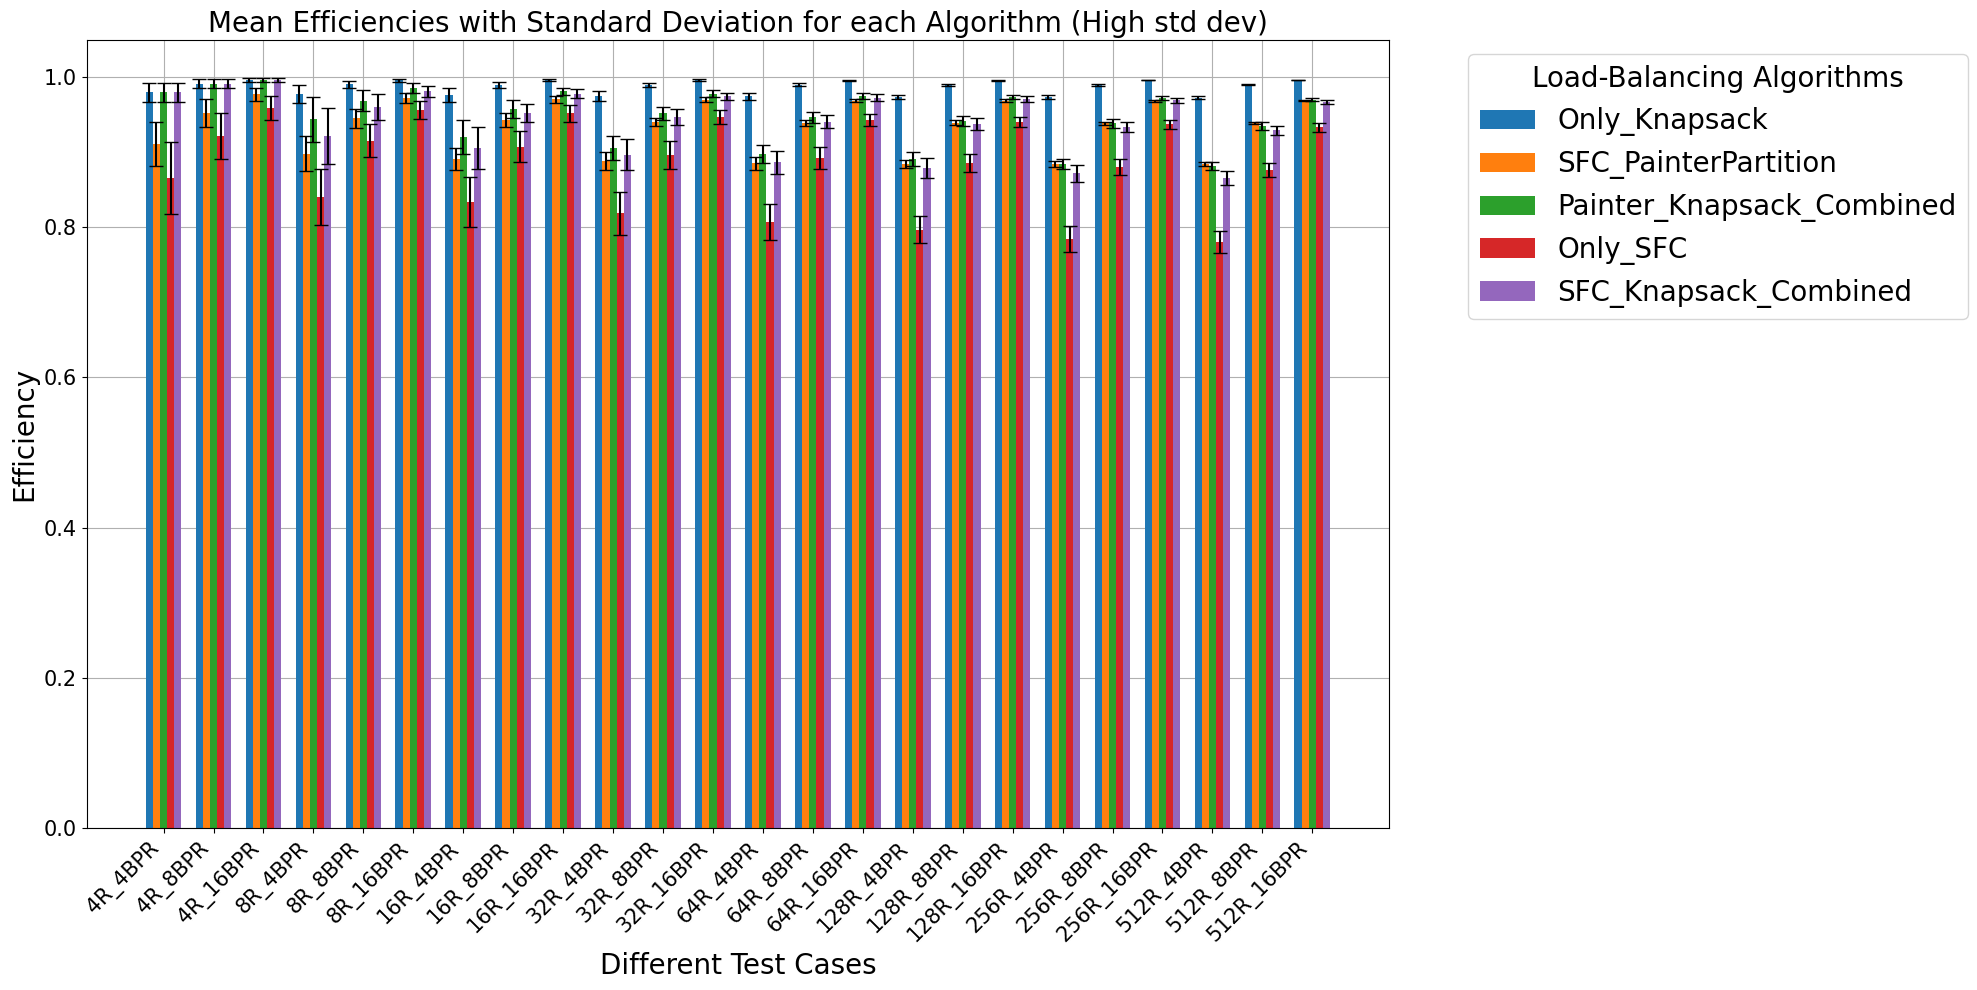

In [25]:
algorithms = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined']
fig, ax = plt.subplots(figsize=(20, 10))
width = 1  
num_algorithms = len(algorithms)
group_gap = 2  
x_spacing = num_algorithms * width + group_gap
x = np.arange(len(grouped['File'])) * x_spacing

for i, alg in enumerate(algorithms):
    mean_col = f'{alg}_Efficiency_mean'
    std_col = f'{alg}_Efficiency_std'
    ax.bar(x + i * width, grouped[mean_col], width,
           yerr=grouped[std_col], capsize=5, label=alg)
    
ax.grid(True)
ax.set_axisbelow(True)
ax.set_xlabel('Different Test Cases', fontsize=20)
ax.set_ylabel('Efficiency', fontsize=20)
ax.set_title('Mean Efficiencies with Standard Deviation for each Algorithm (High std dev)', fontsize=20)
ax.set_xticks(x + width * (num_algorithms - 1) / 2)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(title='Load-Balancing Algorithms', title_fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)

plt.margins(x=0.05)
plt.tight_layout()
# plt.savefig('../result/new_result/result_worst/efficiency_errorbarplot.png', dpi=600)
plt.show()

In [ ]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

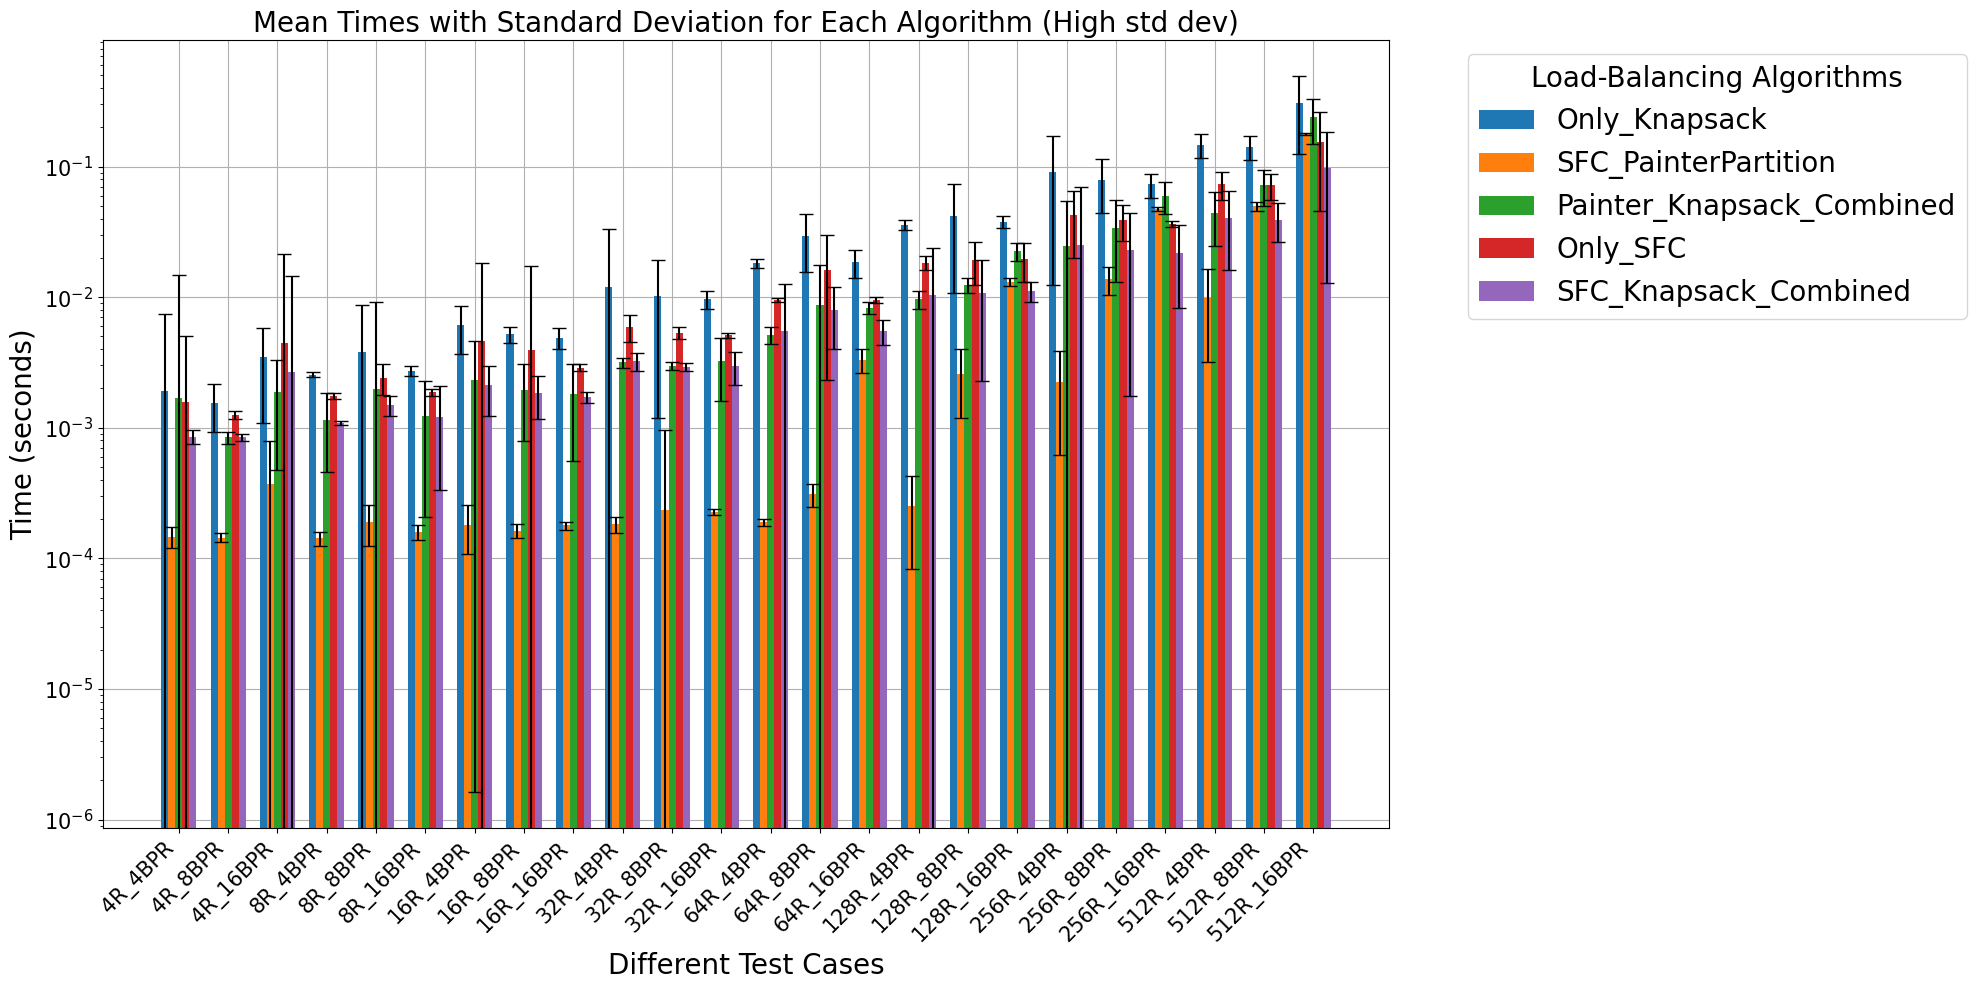

In [26]:

time = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined']
fig, ax = plt.subplots(figsize=(20, 10))
width = 1  
num_algorithms = len(time)
group_gap = 2  
x_spacing = num_algorithms * width + group_gap
x = np.arange(len(grouped['File'])) * x_spacing

for i, alg in enumerate(time):
    mean_col = f'{alg}_Final_Time_mean'
    std_col = f'{alg}_Final_Time_std'
    ax.bar(x + i * width, grouped[mean_col], width,
           yerr=grouped[std_col], capsize=5, label=alg)
ax.grid(True)
ax.set_axisbelow(True)
# Set y-axis to logarithmic scale
ax.set_yscale('log')

ax.set_xlabel('Different Test Cases', fontsize=20)
ax.set_ylabel('Time (seconds)', fontsize=20)
ax.set_title('Mean Times with Standard Deviation for Each Algorithm (High std dev)', fontsize=20)
ax.set_xticks(x + width*(len(time)-1)/2)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(title='Load-Balancing Algorithms', title_fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)
plt.margins(x=0.05)
plt.tight_layout()
# plt.savefig('../result/new_result/result_worst/time_errorbarplot.png', dpi=600)
plt.show()

In [27]:
algorithms = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined']

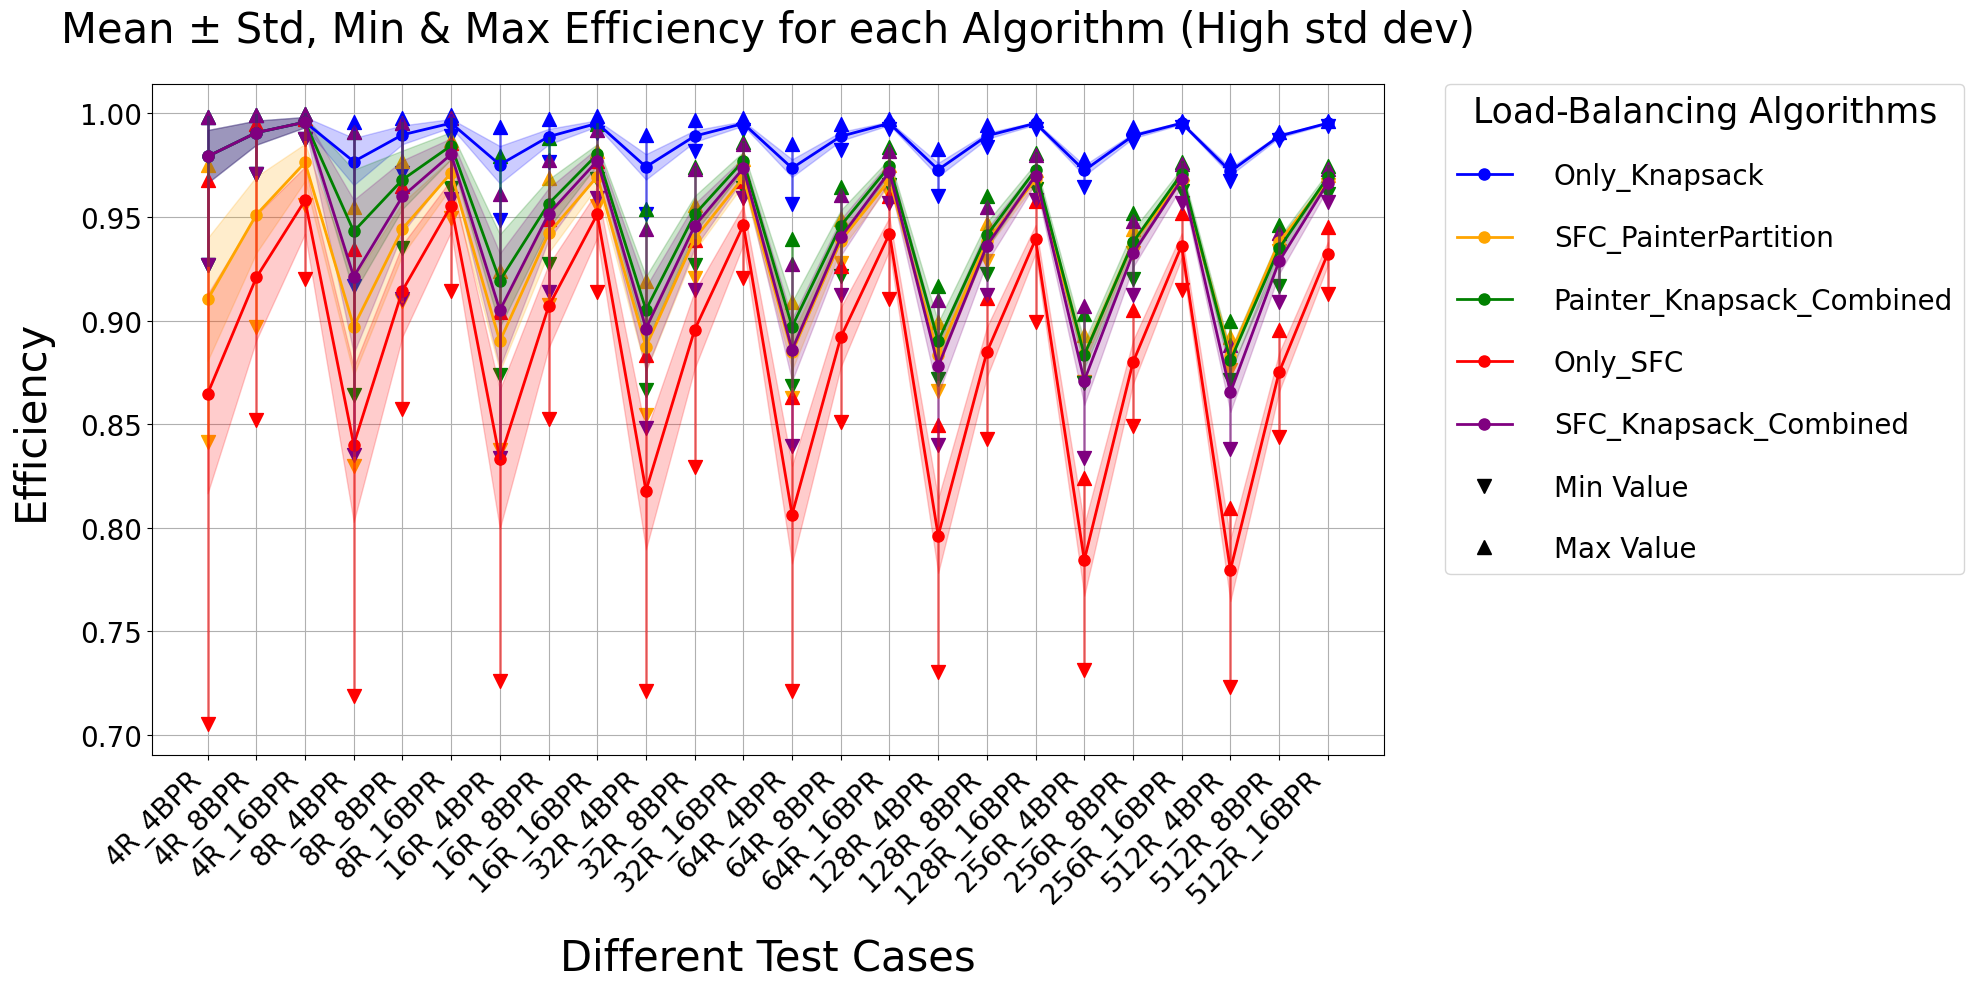

In [28]:

algorithms = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined']
colors = ['blue', 'orange', 'green', 'red', 'purple']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  


    mean_col = f'{alg_name}_Efficiency_mean'
    std_col = f'{alg_name}_Efficiency_std'
    min_col = f'{alg_name}_Efficiency_min'
    max_col = f'{alg_name}_Efficiency_max'

    alg_color = colors[i]
    ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
    for j, file_name in enumerate(grouped['File']):
        min_val = grouped[min_col].iloc[j]
        max_val = grouped[max_col].iloc[j]
        ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
        ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
        ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases',  fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30,labelpad=20)
ax.set_title('Mean ± Std, Min & Max Efficiency for each Algorithm (High std dev)', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

import matplotlib.lines as mlines
min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

handles, labels = ax.get_legend_handles_labels()
handles += [min_marker, max_marker]
labels += ['Min Value', 'Max Value']

ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)
plt.tight_layout()
# plt.savefig('../result/new_result/result_worst/efficiency_all_stats.png', dpi=600)
plt.show()





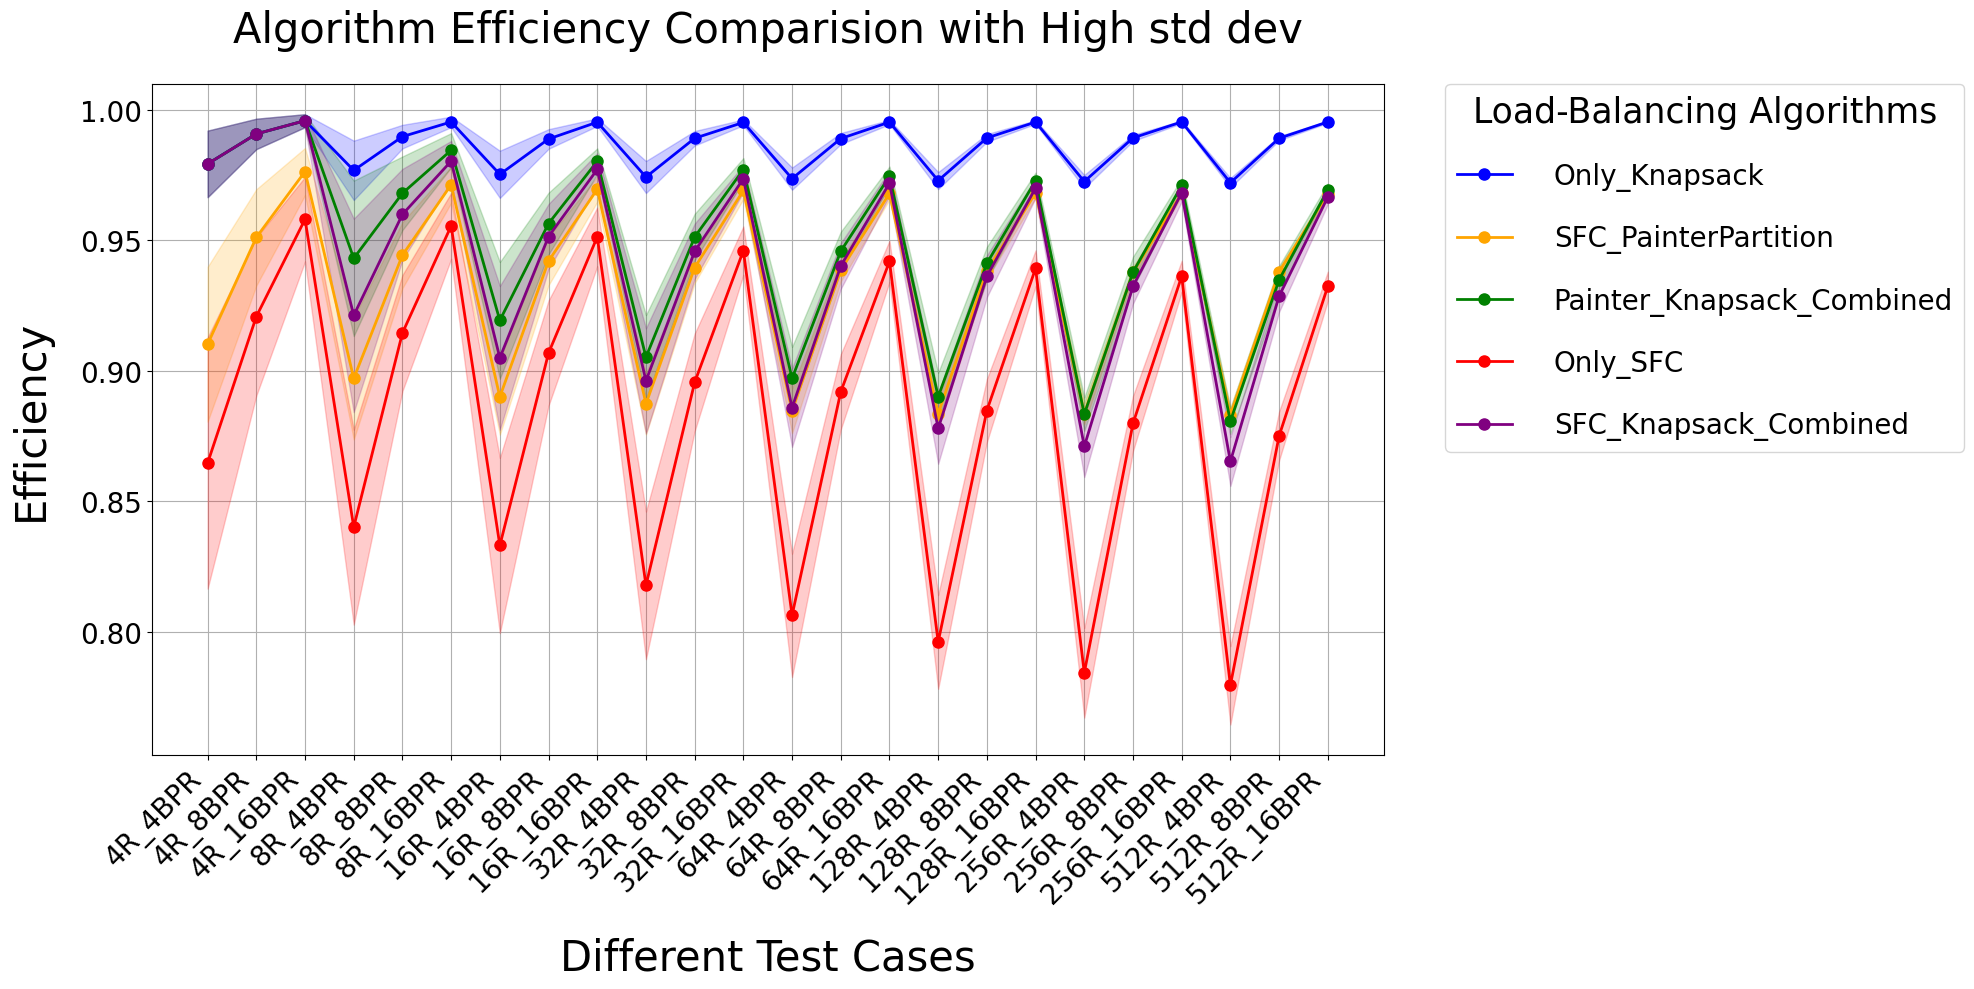

In [29]:
algorithms = [
    'Only_Knapsack', 
    'SFC_PainterPartition', 
    'Painter_Knapsack_Combined', 
    'Only_SFC', 
    'SFC_Knapsack_Combined'
]
colors = ['blue', 'orange', 'green', 'red', 'purple']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  
    
    mean_col = f'{alg_name}_Efficiency_mean'
    std_col  = f'{alg_name}_Efficiency_std'

    alg_color = colors[i]

    ax.plot(
        x, 
        grouped[mean_col], 
        marker='o', 
        color=alg_color, 
        label=alg_name, 
        linewidth=2, 
        markersize=8
    )

    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')

ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30, labelpad=20)
ax.set_title('Algorithm Efficiency Comparision with High std dev',
             pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(
    title='Load-Balancing Algorithms', 
    title_fontsize=25, 
    fontsize=20,
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    borderaxespad=0.,
    labelspacing=1.2, 
    handletextpad=1.5
)

ax.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('../result/new_result/result_worst/efficiency_all_stats_nominmax.png', dpi=600)
plt.show()

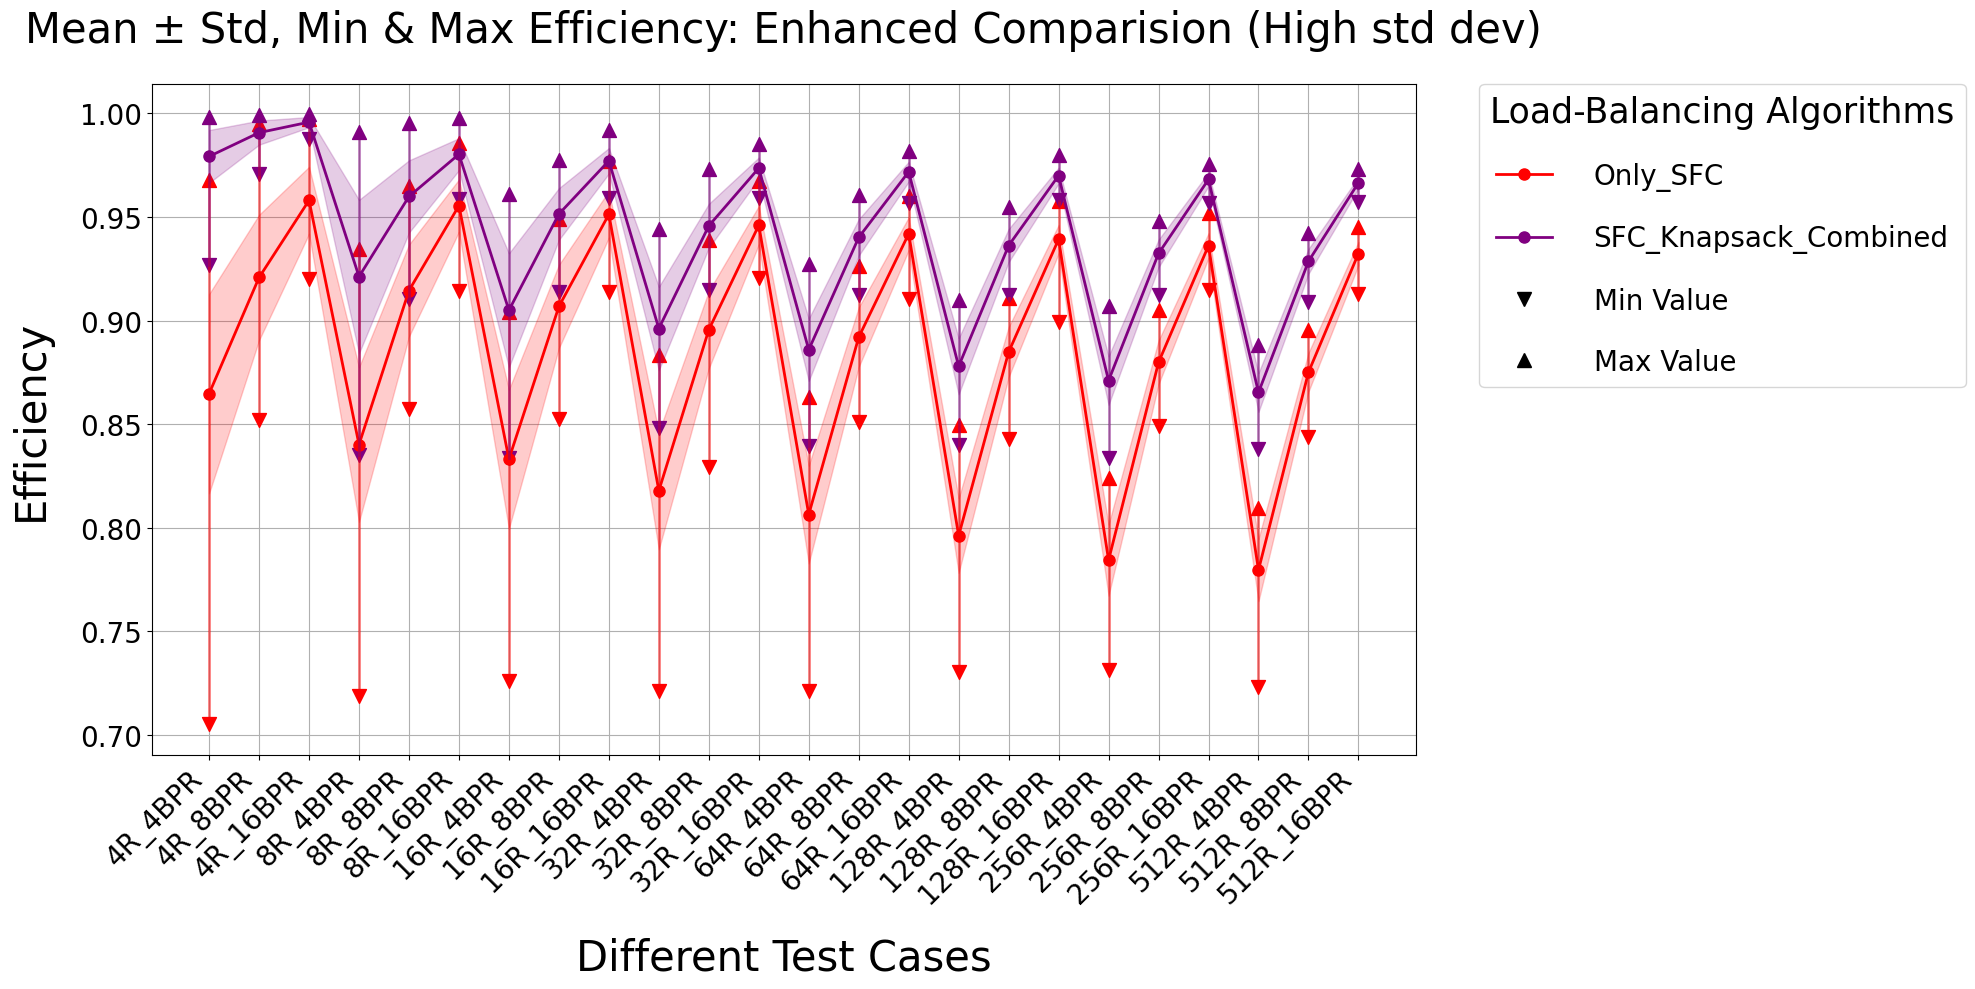

In [30]:


algorithms = ['Only_SFC', 'SFC_Knapsack_Combined']
colors = ['red', 'purple']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  


    mean_col = f'{alg_name}_Efficiency_mean'
    std_col = f'{alg_name}_Efficiency_std'
    min_col = f'{alg_name}_Efficiency_min'
    max_col = f'{alg_name}_Efficiency_max'

    alg_color = colors[i]
    ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
    for j, file_name in enumerate(grouped['File']):
        min_val = grouped[min_col].iloc[j]
        max_val = grouped[max_col].iloc[j]
        ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
        ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
        ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases',  fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30,labelpad=20)
ax.set_title('Mean ± Std, Min & Max Efficiency: Enhanced Comparision (High std dev)', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

import matplotlib.lines as mlines
min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

handles, labels = ax.get_legend_handles_labels()
handles += [min_marker, max_marker]
labels += ['Min Value', 'Max Value']

ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)
plt.tight_layout()
# plt.savefig('../result/new_result/result_worst/efficiency_all_stats_2.png', dpi=600)
plt.show()



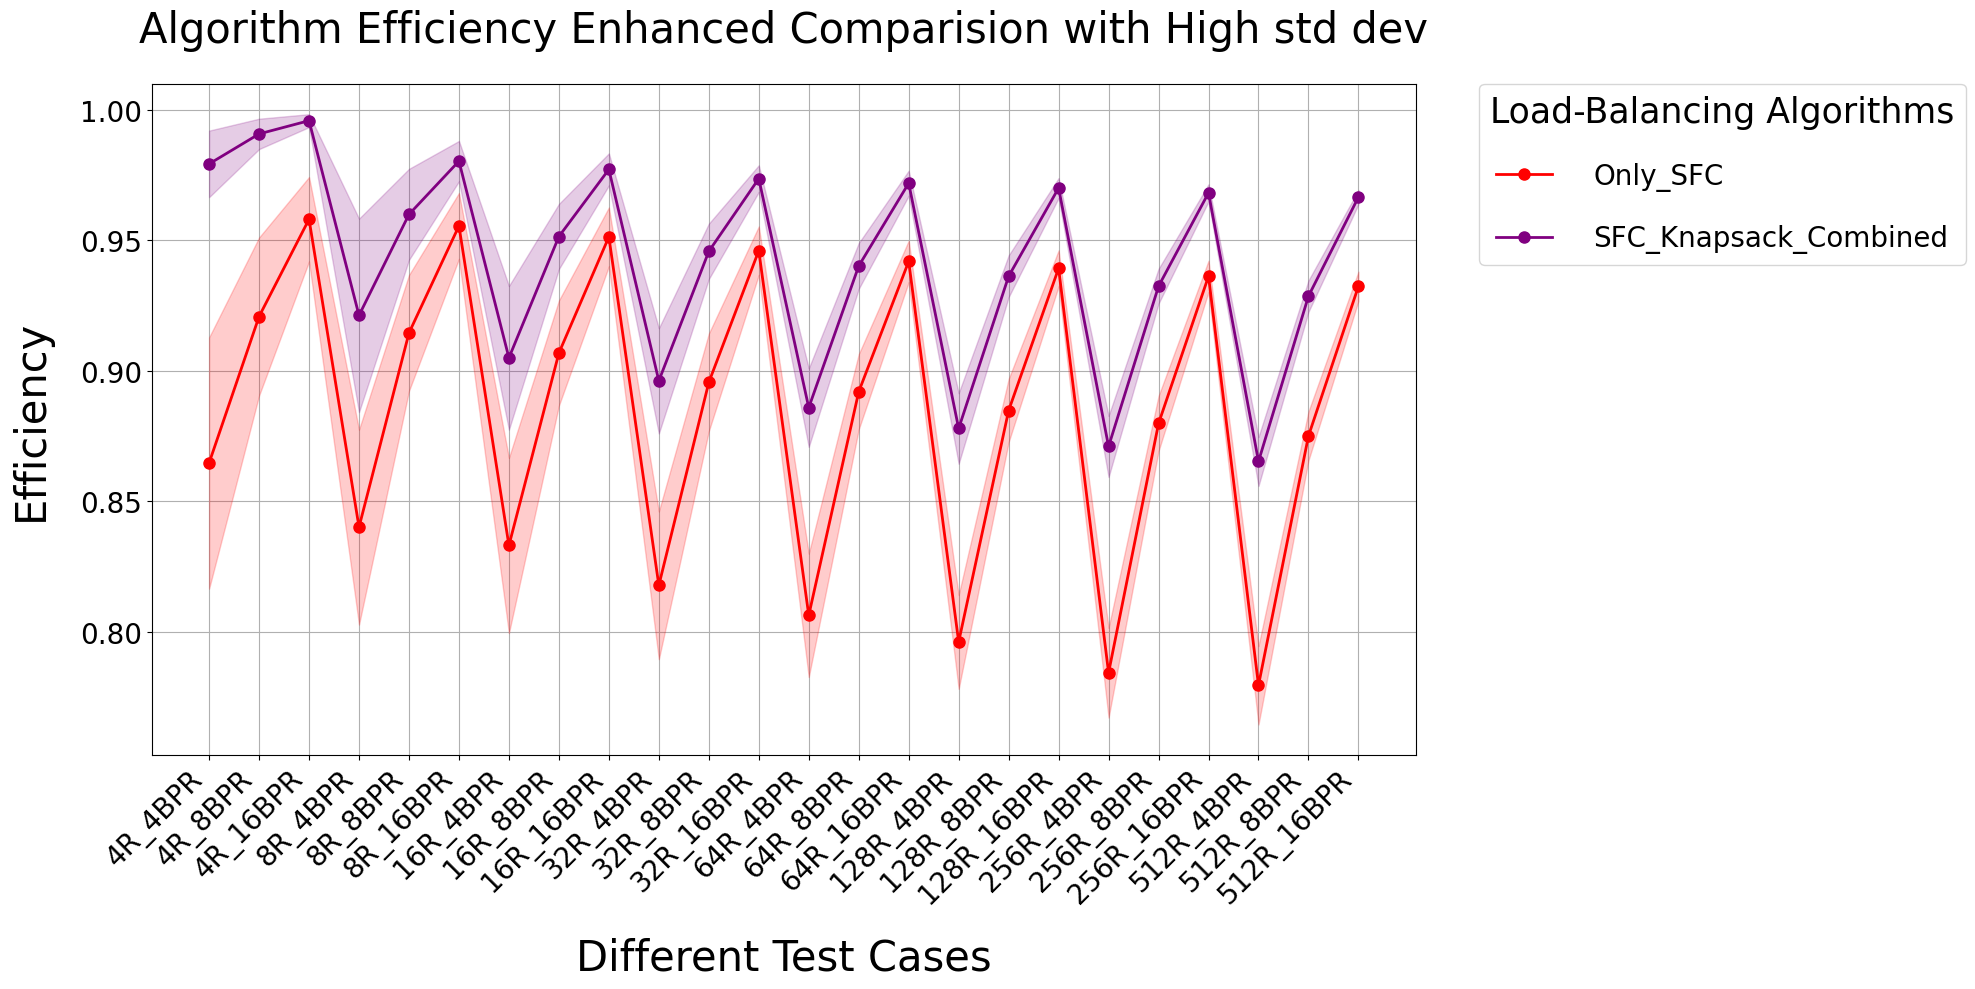

In [31]:
algorithms = ['Only_SFC', 'SFC_Knapsack_Combined']
colors = ['red', 'purple']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  
    
    mean_col = f'{alg_name}_Efficiency_mean'
    std_col  = f'{alg_name}_Efficiency_std'

    alg_color = colors[i]

    ax.plot(
        x, 
        grouped[mean_col], 
        marker='o', 
        color=alg_color, 
        label=alg_name, 
        linewidth=2, 
        markersize=8
    )

    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')

ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30, labelpad=20)
ax.set_title('Algorithm Efficiency Enhanced Comparision with High std dev',
             pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(
    title='Load-Balancing Algorithms', 
    title_fontsize=25, 
    fontsize=20,
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    borderaxespad=0.,
    labelspacing=1.2, 
    handletextpad=1.5
)

ax.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('../result/new_result/result_worst/efficiency_all_stats_2_nominmax.png', dpi=600)
plt.show()

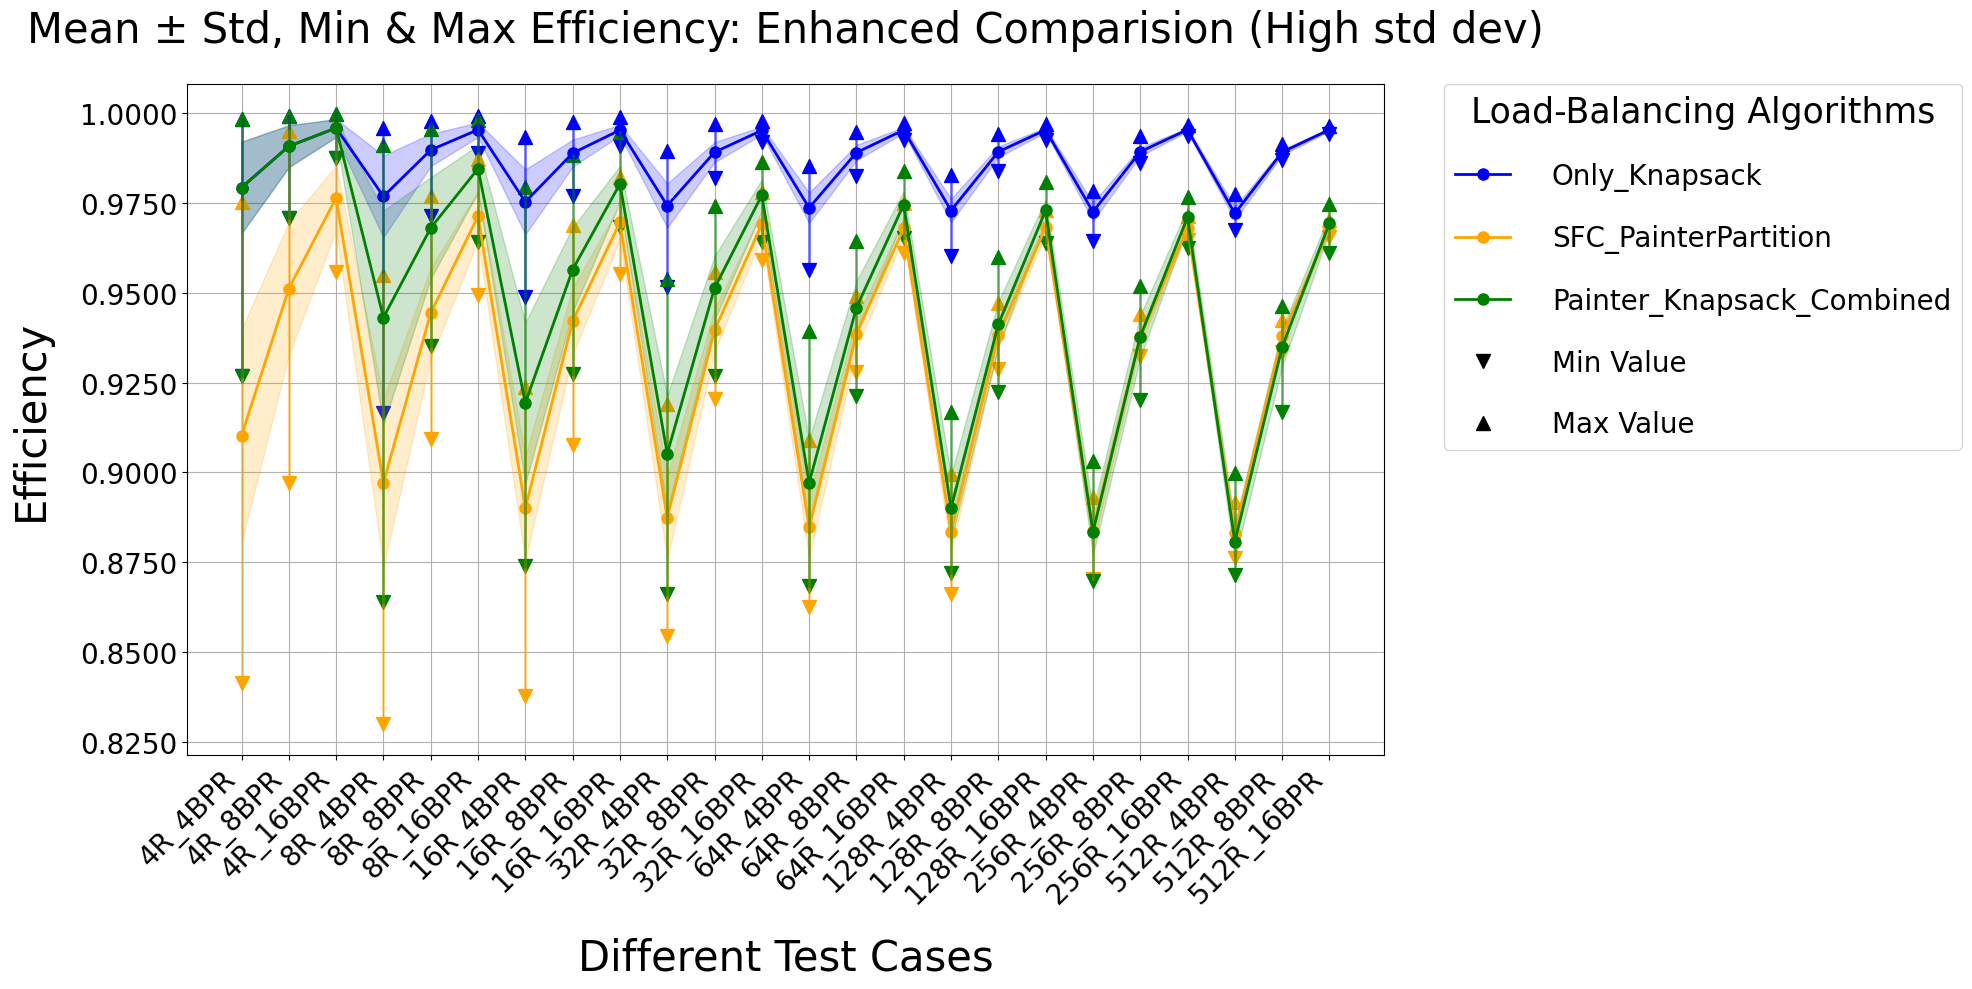

In [32]:
# algorithms = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined']
# colors = ['blue', 'orange', 'green', 'red', 'purple']


algorithms = ['Only_Knapsack', 'SFC_PainterPartition','Painter_Knapsack_Combined']
colors = ['blue','orange', 'green']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  

    mean_col = f'{alg_name}_Efficiency_mean'
    std_col = f'{alg_name}_Efficiency_std'
    min_col = f'{alg_name}_Efficiency_min'
    max_col = f'{alg_name}_Efficiency_max'

    alg_color = colors[i]
    ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
    for j, file_name in enumerate(grouped['File']):
        min_val = grouped[min_col].iloc[j]
        max_val = grouped[max_col].iloc[j]
        ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
        ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
        ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30, labelpad=20)
ax.set_title('Mean ± Std, Min & Max Efficiency: Enhanced Comparision (High std dev)', pad=30, fontsize=30)
# ax.set_ylim(0.990, 1.0005)

ax.tick_params(axis='both', which='major', labelsize=20)

ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.4f'))
min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')
handles, labels = ax.get_legend_handles_labels()
handles += [min_marker, max_marker]
labels += ['Min Value', 'Max Value']

ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20,
          bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
# plt.savefig('../result/new_result/result_worst/efficiency_all_stats_3.png', dpi=600)
plt.show()


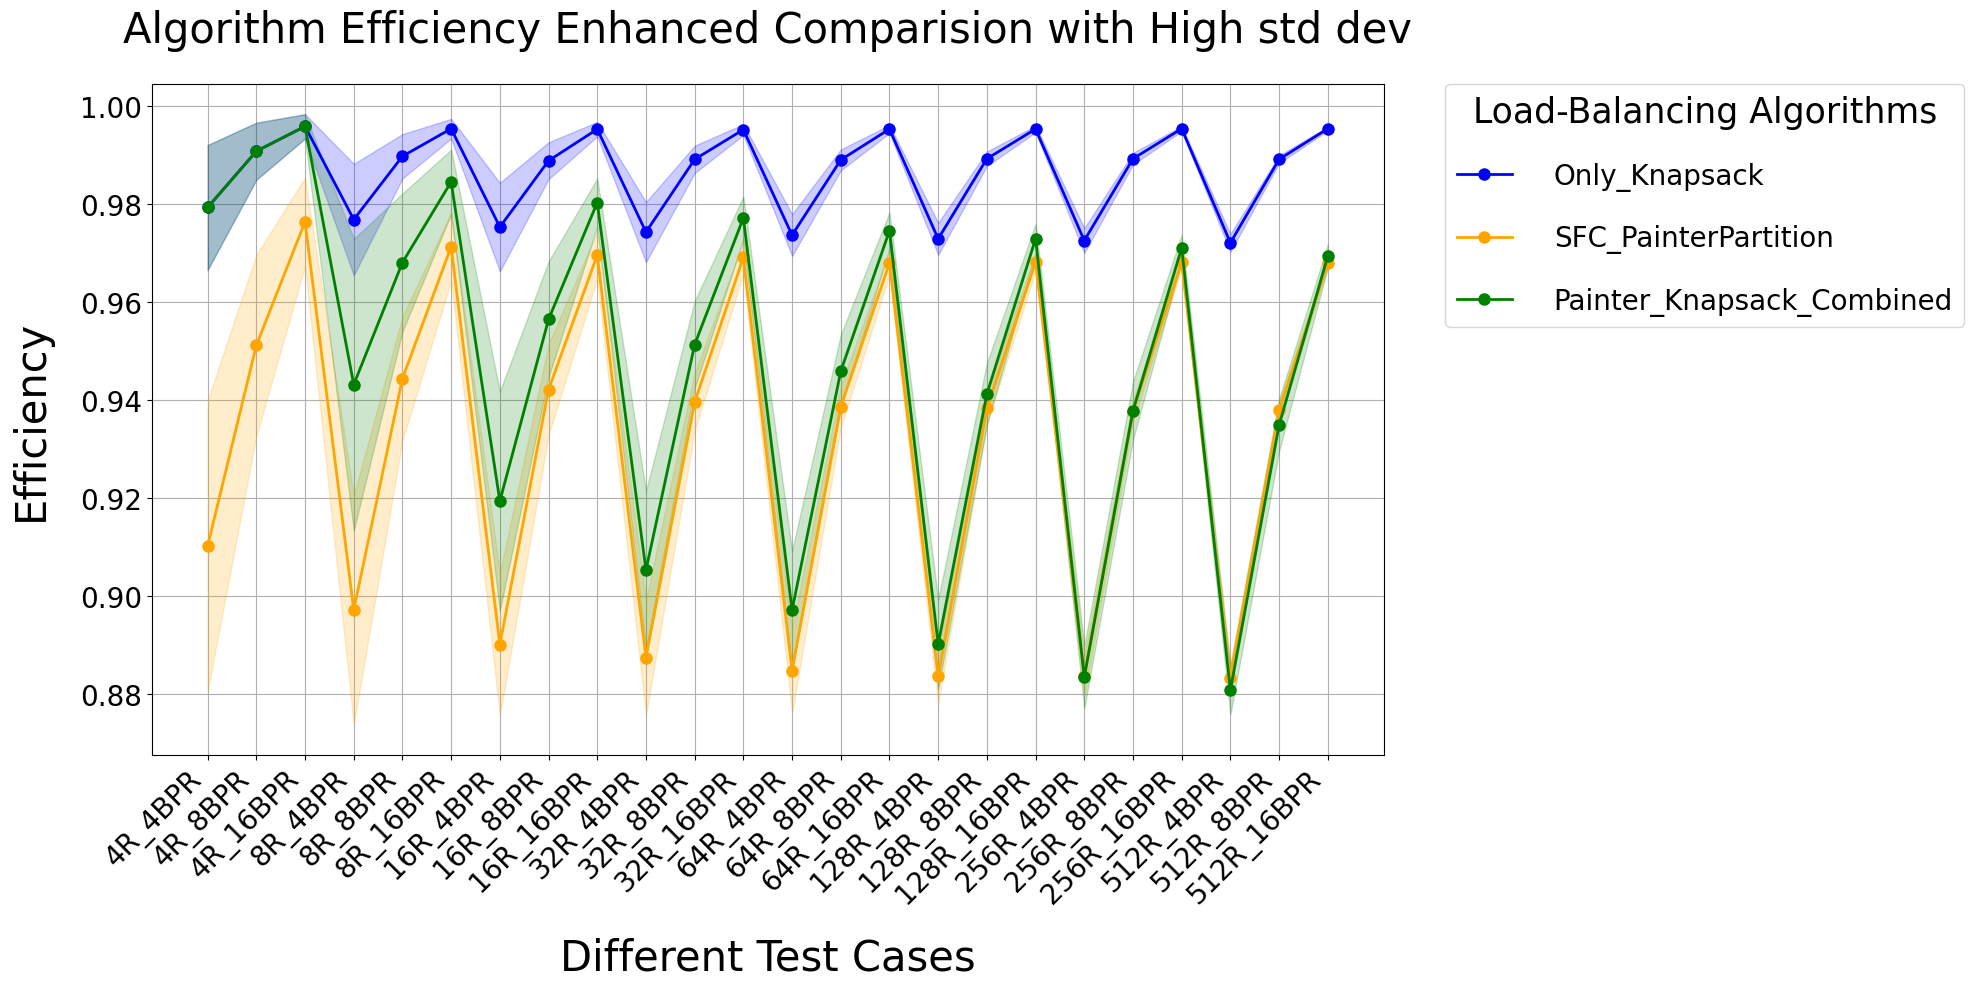

In [33]:
algorithms = ['Only_Knapsack', 'SFC_PainterPartition','Painter_Knapsack_Combined']
colors = ['blue','orange', 'green']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  
    
    mean_col = f'{alg_name}_Efficiency_mean'
    std_col  = f'{alg_name}_Efficiency_std'

    alg_color = colors[i]

    ax.plot(
        x, 
        grouped[mean_col], 
        marker='o', 
        color=alg_color, 
        label=alg_name, 
        linewidth=2, 
        markersize=8
    )

    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')

ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30, labelpad=20)
ax.set_title('Algorithm Efficiency Enhanced Comparision with High std dev',
             pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(
    title='Load-Balancing Algorithms', 
    title_fontsize=25, 
    fontsize=20,
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    borderaxespad=0.,
    labelspacing=1.2, 
    handletextpad=1.5
)

ax.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('../result/new_result/result_worst/efficiency_all_stats_3_nominmax.png', dpi=600)
plt.show()

In [34]:
grouped

File  Only_Knapsack_Efficiency_mean  Only_Knapsack_Efficiency_std  \
0      4R_4BPR                       0.979252                      0.012742   
1      4R_8BPR                       0.990736                      0.005819   
2     4R_16BPR                       0.995809                      0.002482   
3      8R_4BPR                       0.976785                      0.011374   
4      8R_8BPR                       0.989703                      0.004520   
5     8R_16BPR                       0.995328                      0.002008   
6     16R_4BPR                       0.975259                      0.009043   
7     16R_8BPR                       0.988797                      0.003754   
8    16R_16BPR                       0.995231                      0.001471   
9     32R_4BPR                       0.974233                      0.006133   
10    32R_8BPR                       0.989072                      0.002782   
11   32R_16BPR                       0.995139                      0.001105   
12    64R_4BPR                       0.973615                      0.004253   
13    64R_8BPR                       0.988960                      0.002135   
14   64R_16BPR                       0.995256                      0.000818   
15   128R_4BPR                       0.972856                      0.003269   
16   128R_8BPR                       0.989199                      0.001475   
17  128R_16BPR                       0.995268                      0.000671   
18   256R_4BPR                       0.972500                      0.002526   
19   256R_8BPR                       0.989201                      0.001186   
20  256R_16BPR                       0.995333                      0.000506   
21   512R_4BPR                       0.972042                      0.001817   
22   512R_8BPR                       0.989081                      0.000791   
23  512R_16BPR                       0.995340                      0.000367   

    Only_Knapsack_Efficiency_min  Only_Knapsack_Efficiency_max  \
0                       0.926739                      0.998268   
1                       0.970898                      0.999140   
2                       0.987458                      0.999651   
3                       0.916502                      0.995745   
4                       0.971434                      0.997724   
5                       0.988915                      0.999180   
6                       0.948714                      0.993327   
7                       0.976774                      0.997552   
8                       0.990788                      0.998800   
9                       0.951465                      0.989379   
10                      0.981998                      0.996958   
11                      0.991798                      0.997789   
12                      0.956254                      0.985171   
13                      0.982381                      0.994750   
14                      0.992351                      0.997232   
15                      0.960329                      0.982744   
16                      0.983769                      0.994245   
17                      0.992411                      0.996911   
18                      0.964328                      0.978161   
19                      0.986019                      0.993702   
20                      0.993527                      0.996578   
21                      0.967377                      0.977386   
22                      0.986978                      0.991281   
23                      0.994125                      0.996502   

    SFC_PainterPartition_Efficiency_mean  SFC_PainterPartition_Efficiency_std  \
0                               0.910214                             0.029636   
1                               0.951124                             0.018439   
2                               0.976340                             0.009014   
3                               0.897108                   

In [35]:

# time = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined']
# colors = ['blue', 'orange', 'green', 'red', 'purple']

# fig, ax = plt.subplots(figsize=(20, 10))

# for i, alg in enumerate(time):
#     alg_name = alg  

#     mean_col = f'{alg_name}_Final_Time_mean'
#     std_col = f'{alg_name}_Final_Time_std'
#     min_col = f'{alg_name}_Final_Time_min'
#     max_col = f'{alg_name}_Final_Time_max'

#     alg_color = colors[i]
#     ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
#     lower_bound = np.maximum(grouped[mean_col] - grouped[std_col], 1e-5) 
#     upper_bound = grouped[mean_col] + grouped[std_col]

#     ax.fill_between(
#         x,
#         lower_bound,
#         upper_bound,
#         color=alg_color,
#         alpha=0.2
#     )
#     for j, file_name in enumerate(grouped['File']):
#         min_val = grouped[min_col].iloc[j]
#         max_val = grouped[max_col].iloc[j]
#         ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
#         ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
#         ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

# ax.set_xticks(x)
# ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
# ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
# ax.set_ylabel('Time (seconds)', fontsize=30, labelpad=20)
# ax.set_title('Mean ± Std, Min & Max Time for each Algorithm (High std dev)', pad=30, fontsize=30)
# ax.tick_params(axis='both', which='major', labelsize=20)
# ax.set_yscale('log')
# ax.set_ylim(1e-6, 0)  

# min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
# max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

# handles, labels = ax.get_legend_handles_labels()
# handles += [min_marker, max_marker]
# labels += ['Min Value', 'Max Value']

# ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20,
#           bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labelspacing=1.2, handletextpad=1.5)
# ax.grid(True)
# ax.set_axisbelow(True)

# plt.tight_layout()
# # plt.savefig('../result/new_result/result_best/time_all_stats.png', dpi=600)
# plt.show()




In [36]:
# time = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined']
# colors = ['blue', 'orange', 'green', 'red', 'purple']

# fig, ax = plt.subplots(figsize=(20, 10))

# for i, alg in enumerate(time):
#     alg_name = alg  

#     mean_col = f'{alg_name}_Final_Time_mean'
#     min_col = f'{alg_name}_Final_Time_min'
#     max_col = f'{alg_name}_Final_Time_max'

#     alg_color = colors[i]

#     ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
#     for j, file_name in enumerate(grouped['File']):
#         min_val = grouped[min_col].iloc[j]
#         max_val = grouped[max_col].iloc[j]

#         ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)

#         ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)

#         ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)


# ax.set_xticks(x)
# ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
# ax.set_xlabel('Different Test Cases', fontsize=30,labelpad=20)
# ax.set_ylabel('Time (seconds)', fontsize=30,  labelpad=20)
# ax.set_title('Mean, Min & Max Time for each Algorithm (High std dev)', pad=30, fontsize=30)
# ax.tick_params(axis='both', which='major', labelsize=20)

# ax.set_yscale('log')
# ax.set_ylim(1e-7, 0)  


# min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
# max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

# handles, labels = ax.get_legend_handles_labels()
# handles += [min_marker, max_marker]
# labels += ['Min Value', 'Max Value']

# ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=20, fontsize=20,
#           bbox_to_anchor=(1.05, 1), loc='upper left',  borderaxespad=0., labelspacing=1.2, handletextpad=1.5)
# ax.grid(True)
# ax.set_axisbelow(True)

# plt.tight_layout()
# # plt.savefig('../result/new_result/result_best/time_all_stats_2.png', dpi=600)
# plt.show()




In [37]:
grouped

File  Only_Knapsack_Efficiency_mean  Only_Knapsack_Efficiency_std  \
0      4R_4BPR                       0.979252                      0.012742   
1      4R_8BPR                       0.990736                      0.005819   
2     4R_16BPR                       0.995809                      0.002482   
3      8R_4BPR                       0.976785                      0.011374   
4      8R_8BPR                       0.989703                      0.004520   
5     8R_16BPR                       0.995328                      0.002008   
6     16R_4BPR                       0.975259                      0.009043   
7     16R_8BPR                       0.988797                      0.003754   
8    16R_16BPR                       0.995231                      0.001471   
9     32R_4BPR                       0.974233                      0.006133   
10    32R_8BPR                       0.989072                      0.002782   
11   32R_16BPR                       0.995139                      0.001105   
12    64R_4BPR                       0.973615                      0.004253   
13    64R_8BPR                       0.988960                      0.002135   
14   64R_16BPR                       0.995256                      0.000818   
15   128R_4BPR                       0.972856                      0.003269   
16   128R_8BPR                       0.989199                      0.001475   
17  128R_16BPR                       0.995268                      0.000671   
18   256R_4BPR                       0.972500                      0.002526   
19   256R_8BPR                       0.989201                      0.001186   
20  256R_16BPR                       0.995333                      0.000506   
21   512R_4BPR                       0.972042                      0.001817   
22   512R_8BPR                       0.989081                      0.000791   
23  512R_16BPR                       0.995340                      0.000367   

    Only_Knapsack_Efficiency_min  Only_Knapsack_Efficiency_max  \
0                       0.926739                      0.998268   
1                       0.970898                      0.999140   
2                       0.987458                      0.999651   
3                       0.916502                      0.995745   
4                       0.971434                      0.997724   
5                       0.988915                      0.999180   
6                       0.948714                      0.993327   
7                       0.976774                      0.997552   
8                       0.990788                      0.998800   
9                       0.951465                      0.989379   
10                      0.981998                      0.996958   
11                      0.991798                      0.997789   
12                      0.956254                      0.985171   
13                      0.982381                      0.994750   
14                      0.992351                      0.997232   
15                      0.960329                      0.982744   
16                      0.983769                      0.994245   
17                      0.992411                      0.996911   
18                      0.964328                      0.978161   
19                      0.986019                      0.993702   
20                      0.993527                      0.996578   
21                      0.967377                      0.977386   
22                      0.986978                      0.991281   
23                      0.994125                      0.996502   

    SFC_PainterPartition_Efficiency_mean  SFC_PainterPartition_Efficiency_std  \
0                               0.910214                             0.029636   
1                               0.951124                             0.018439   
2                               0.976340                             0.009014   
3                               0.897108                   

In [38]:
columns_to_keep = ['File','Only_Knapsack_Efficiency_mean', 'Only_SFC_Efficiency_mean', 'SFC_PainterPartition_Efficiency_mean', 'Painter_Knapsack_Combined_Efficiency_mean', 'SFC_Knapsack_Combined_Efficiency_mean', 'Only_Knapsack_Final_Time_mean', 'Only_SFC_Final_Time_mean', 'SFC_PainterPartition_Final_Time_mean', 'Painter_Knapsack_Combined_Final_Time_mean', 'SFC_Knapsack_Combined_Final_Time_mean' ]
new_df = grouped[columns_to_keep]


In [39]:
new_df

File  Only_Knapsack_Efficiency_mean  Only_SFC_Efficiency_mean  \
0      4R_4BPR                       0.979252                  0.864729   
1      4R_8BPR                       0.990736                  0.920818   
2     4R_16BPR                       0.995809                  0.958065   
3      8R_4BPR                       0.976785                  0.840183   
4      8R_8BPR                       0.989703                  0.914523   
5     8R_16BPR                       0.995328                  0.955506   
6     16R_4BPR                       0.975259                  0.833164   
7     16R_8BPR                       0.988797                  0.906831   
8    16R_16BPR                       0.995231                  0.951309   
9     32R_4BPR                       0.974233                  0.817892   
10    32R_8BPR                       0.989072                  0.895597   
11   32R_16BPR                       0.995139                  0.946033   
12    64R_4BPR                       0.973615                  0.806409   
13    64R_8BPR                       0.988960                  0.892005   
14   64R_16BPR                       0.995256                  0.941917   
15   128R_4BPR                       0.972856                  0.796229   
16   128R_8BPR                       0.989199                  0.884813   
17  128R_16BPR                       0.995268                  0.939268   
18   256R_4BPR                       0.972500                  0.784419   
19   256R_8BPR                       0.989201                  0.879862   
20  256R_16BPR                       0.995333                  0.936229   
21   512R_4BPR                       0.972042                  0.779636   
22   512R_8BPR                       0.989081                  0.875083   
23  512R_16BPR                       0.995340                  0.932388   

    SFC_PainterPartition_Efficiency_mean  \
0                               0.910214   
1                               0.951124   
2                               0.976340   
3                               0.897108   
4                               0.944332   
5                               0.971262   
6                               0.890053   
7                               0.942094   
8                               0.969544   
9                               0.887400   
10                              0.939539   
11                              0.969075   
12                              0.884740   
13                              0.938589   
14                              0.967964   
15                              0.883575   
16                              0.938295   
17                              0.968144   
18                              0.883673   
19                              0.937709   
20                              0.968024   
21                              0.883141   
22                              0.937928   
23                              0.967865   

    Painter_Knapsack_Combined_Efficiency_mean  \
0                                    0.979252   
1                                    0.990736   
2                                    0.995809   
3                                    0.943096   
4                                    0.968021   
5                                    0.984481   
6                                    0.919340   
7                                    0.956418   
8                                    0.980264   
9                                    0.905246   
10                                   0.951267   
11                                   0.977109   
12                                   0.897088   
13                                   0.945836   
14                                   0.974524   
15                                   0.890122   
16                                   0.941191   
17                                   0.972870   
18                                   0.883432   
19                                   0.937784   
20  

In [40]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

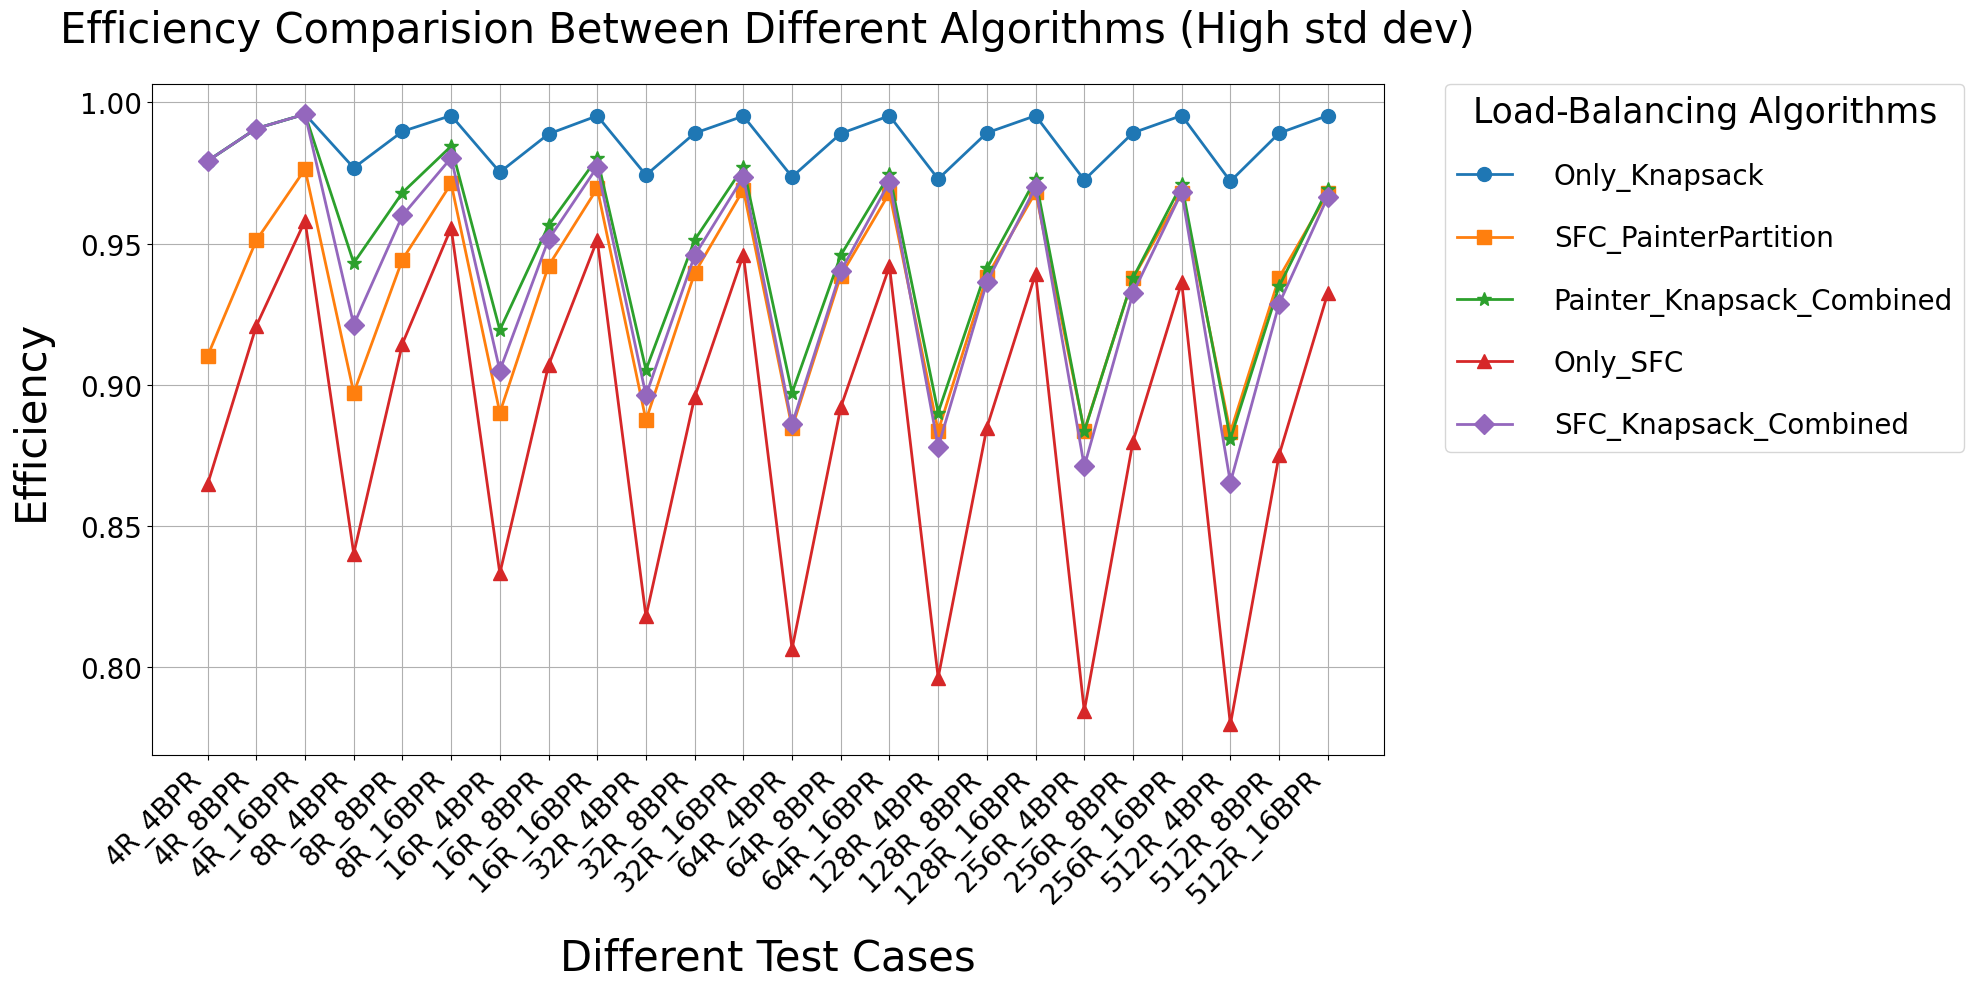

In [41]:
algorithms = [
    ('Only_Knapsack', 'Only_Knapsack_Efficiency_mean', 'Only_Knapsack_Final_Time_mean', 'o'),
    ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency_mean', 'SFC_PainterPartition_Final_Time_mean', 's'),
    ('Painter_Knapsack_Combined', 'Painter_Knapsack_Combined_Efficiency_mean', 'Painter_Knapsack_Combined_Final_Time_mean', '*'),
    ('Only_SFC', 'Only_SFC_Efficiency_mean', 'Only_SFC_Final_Time_mean', '^'),
    ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency_mean', 'SFC_Knapsack_Combined_Final_Time_mean', 'D')
]

x = np.arange(len(new_df['File']))
fig, ax = plt.subplots(figsize=(20, 10))

for alg_name, eff_col, time_col, marker in algorithms:
    ax.plot(x, new_df[eff_col], marker=marker, markersize=10, linewidth=2, label=alg_name)
ax.set_xticks(x)
ax.set_xticklabels(new_df['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases', fontsize=30,labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30,  labelpad=20)
ax.set_title('Efficiency Comparision Between Different Algorithms (High std dev)', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left',borderaxespad=0.,labelspacing=1.2, handletextpad=1.5)

ax.grid(True)
ax.set_axisbelow(True)
plt.tight_layout()
# plt.savefig('../result/new_result/result_worst/efficiency.png', dpi=600)
plt.show()





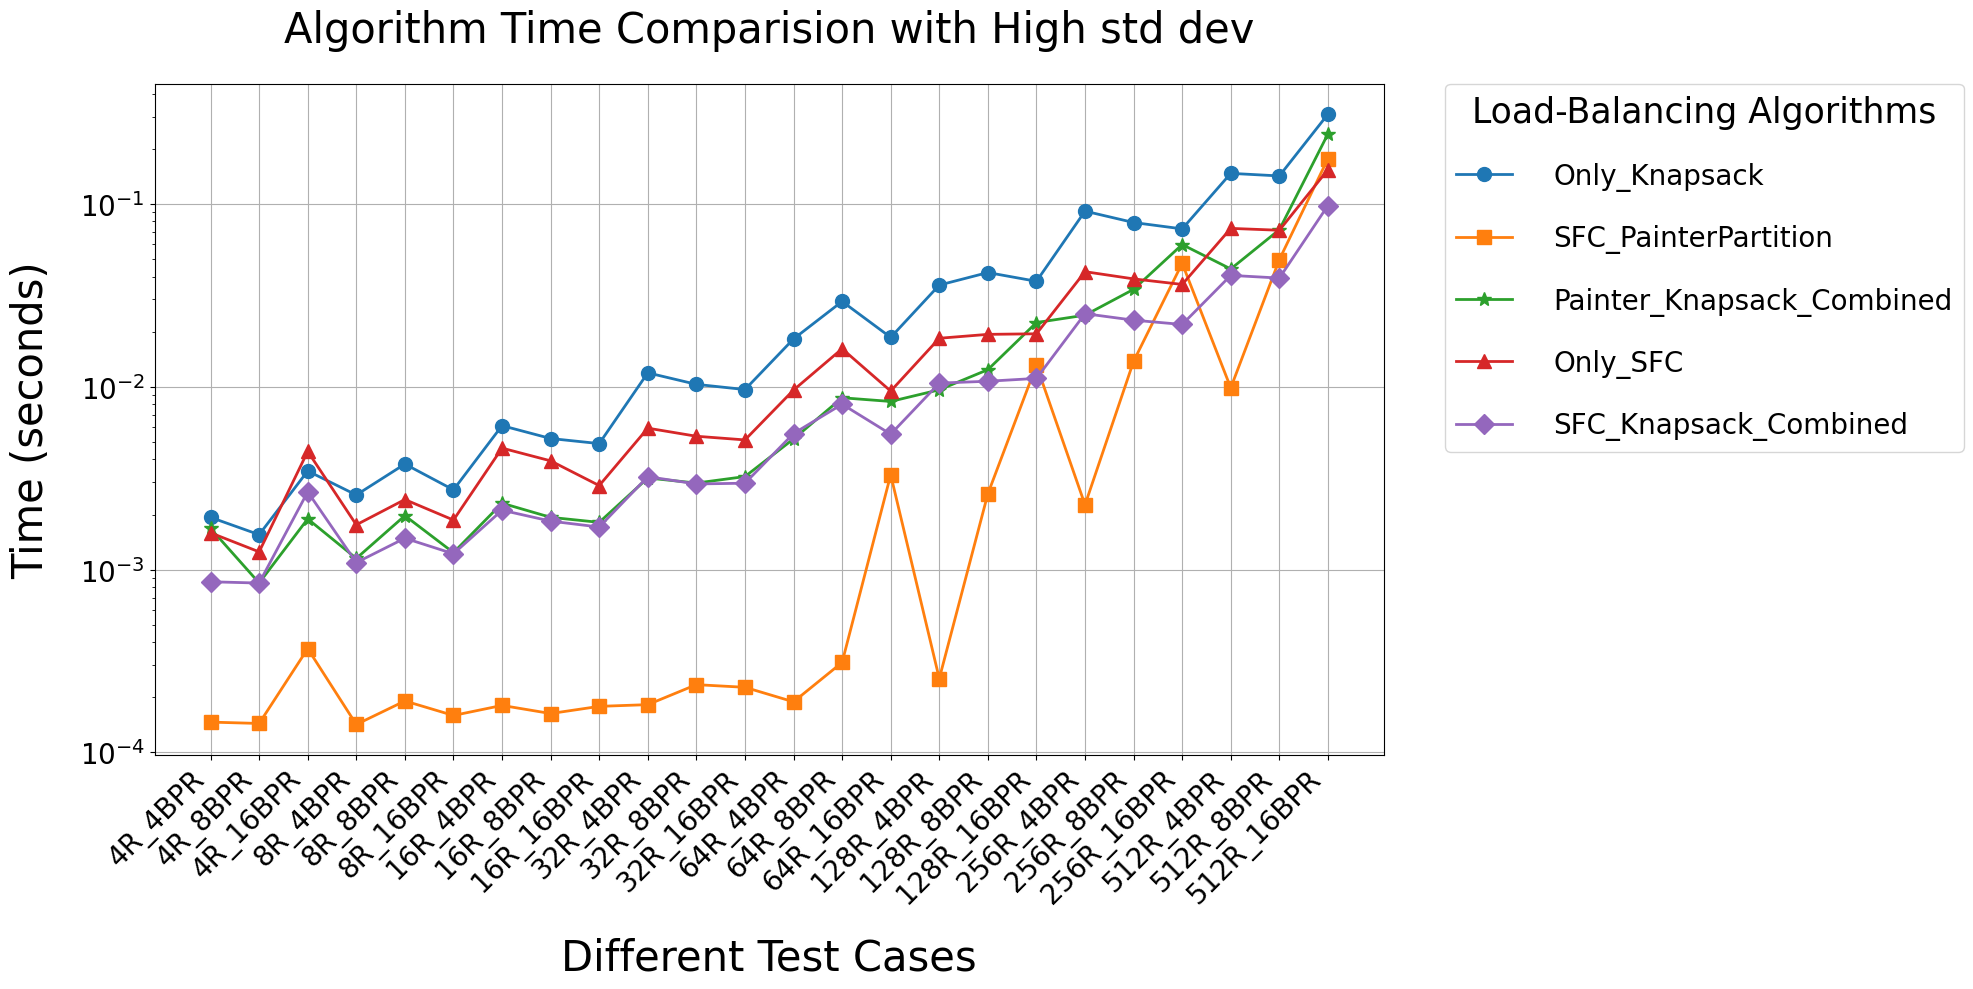

In [42]:
# fig, ax = plt.subplots(figsize=(20, 10))

# for alg_name, eff_col, time_col, marker in algorithms:
#     ax.plot(x, new_df[time_col], marker=marker, markersize=10, linewidth=2, label=alg_name)
# ax.set_xticks(x)
# ax.set_xticklabels(new_df['File'], rotation=45, ha='right')
# ax.set_xlabel('File', fontsize=15)
# ax.set_ylabel('Time (seconds)', fontsize=15)
# ax.set_title('Time Means by File and Algorithm', fontsize=20)
# ax.tick_params(axis='both', which='major', labelsize=15)
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)

# plt.tight_layout()
# plt.show()


x = np.arange(len(new_df['File']))
fig, ax = plt.subplots(figsize=(20, 10))

for alg_name, eff_col, time_col, marker in algorithms:
    ax.plot(x, new_df[time_col], marker=marker, markersize=10, linewidth=2, label=alg_name)
ax.set_xticks(x)
ax.set_xticklabels(new_df['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases', fontsize=30,labelpad=20)
ax.set_ylabel('Time (seconds)',  fontsize=30,  labelpad=20)
ax.set_title('Algorithm Time Comparision with High std dev', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left',borderaxespad=0.,labelspacing=1.2, handletextpad=1.5)

ax.grid(True)
ax.set_axisbelow(True)
ax.set_yscale('log')
plt.tight_layout()
plt.savefig('../result/new_result/result_worst/time.png', dpi=600)
plt.show()


